In this notebook, I will compare several binary classification models using a simulated dataset.

The data is simulated using scikit-learn's ```make_classification```. First, the models will be trained and tested on a simple dataset with 2 relevant features. Later, they will be trained and tested on a more complex dataset with both redundant and repeated features without any feature engineering. ```make_classification``` documentation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html).

I will try the following scikit-learn classifiers (click on the model name for documentation): [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html),
[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html),
[LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html),
[KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html),
[RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html).

I will also add multiplayer perceptrons in Keras and PyTorch and evaluate their performances.

Let's create a dataframe to store accuracies of the classifier for comparison later.

In [1]:
import pandas as pd

accuracy_df = pd.DataFrame(columns = ['Dataset 1', 'Dataset 2', 'Dataset 3', 
                                      'Dataset 4', 'Dataset 5'])

In [2]:
# create simulated data with 2 features
from sklearn.datasets import make_classification

X, Y = make_classification(n_samples = 1000,
                           n_features = 2,
                           n_informative = 2,
                           n_redundant = 0,
                           n_clusters_per_class = 1,
                           random_state = 47)

In [3]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 47)

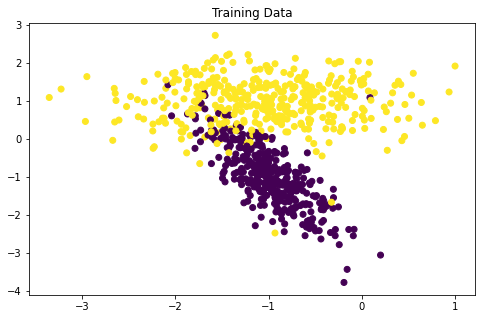

In [4]:
# plot the training data
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(X_train[:,0], X_train[:,1], c = Y_train)
plt.title('Training Data')
plt.show()

In [5]:
# import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [6]:
# initialize scikit-learn classifiers with mostly default values
log_reg = LogisticRegression()
dt_clf = DecisionTreeClassifier()
# initialize Linear SVC with max_iter = 10000 to ensure convergence
linear_svc = LinearSVC(max_iter = 10000)
kn_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()


clf_list = [log_reg, dt_clf, linear_svc, kn_clf, rf_clf, gb_clf]

clf_names = ['Logistic Regression', 'Decision Tree Classifier', 'Linear SVC',
            'KNN Classifier', 'Random Forest Classifier', 'Gradient Boosting Classfier']

In [7]:
# define a function that will take in training and testing data,
# and then will fit the classifiers and score their predictions

def scikit_clf_fit_score(x_train, y_train, x_test, y_test, dataset_num):
    
    # loop over each classifier in clf_list, fit, score, add score to accuracy_df
    dataset = f'Dataset {dataset_num}'
    
    for i in range(6):
        clf_list[i].fit(x_train, y_train)
        score = clf_list[i].score(x_test, y_test)
        accuracy_df.loc[clf_names[i], dataset] = score
        print(f'{clf_names[i]}: {score}')

In [8]:
%%time
scikit_clf_fit_score(X_train, Y_train, X_test, Y_test, 1)

Logistic Regression: 0.928
Decision Tree Classifier: 0.94
Linear SVC: 0.928
KNN Classifier: 0.952
Random Forest Classifier: 0.948
Gradient Boosting Classfier: 0.952
Wall time: 667 ms


In [9]:
# create a function that fits and evaluates a binary classification model in Keras
from keras.models import Sequential
from keras.layers import Dense

def keras_nn_fit_score(x_train, y_train, x_test, y_test, dataset_num, n_epochs = 50):
    
    dataset = f'Dataset {dataset_num}'
    
    # three layer model with ReLU applied to the first two layers
    # and sigmoid to the last one
    model = Sequential([
    Dense(30, input_shape=(x_train.shape[1],), activation = 'relu'),
    Dense(30, activation = 'relu'),
    Dense(1, activation = 'sigmoid')])
    
    # compile the model using binary crossentropy as the loss function and
    # binary accuracy as the evaluation metric
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
    model.fit(x_train, y_train, epochs = n_epochs)
    
    # evaluate using the test data
    results = model.evaluate(x_test, y_test)
    accuracy_df.loc['Keras NN', dataset] = float(f'{results[1]:.3}')
    print(results)

In [10]:
%%time
keras_nn_fit_score(X_train, Y_train, X_test, Y_test, 1)

Epoch 1/50
24/24 [==============================] - 0s 1ms/step - loss: 0.5514 - binary_accuracy: 0.8507
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 0.4160 - binary_accuracy: 0.9253
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3188 - binary_accuracy: 0.9267
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2630 - binary_accuracy: 0.9213
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2340 - binary_accuracy: 0.9253
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2192 - binary_accuracy: 0.9227
Epoch 7/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2119 - binary_accuracy: 0.9267
Epoch 8/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2073 - binary_accuracy: 0.9253
Epoch 9/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2044 - binary_accuracy: 0.9280
Epoch 10/50
24/24 [==============================] - 0s

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# BCELoss will be used for all neural networks
criterion = nn.BCELoss()

In [12]:
# create a binary classification model in PyTorch
# the NN will be the same except for the number of input nodes for all datasets

class TorchBinaryClassifier(nn.Module):
    
    def __init__(self, in_dimension):
        
        super(TorchBinaryClassifier, self).__init__()
        
        # 3 layer NN similar to the one done in Keras
        self.fc1 = nn.Linear(in_dimension, 30)
        self.fc2 = nn.Linear(30, 30)
        self.fc3 = nn.Linear(30, 1)
        
        # sigmoid layer for classification
        self.sig = nn.Sigmoid()
        
    def forward(self, x):
        
        # apply ReLU after each of the first two layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        # apply sigmoid function before returning the value
        x = self.sig(x)
        
        return x

In [13]:
# speficy train and test data
from torch.utils.data import TensorDataset, DataLoader

# set up a function to get dataloaders
def pytorch_loaders(x_train, y_train, x_test, y_test):
    
    X_train_tensor = torch.from_numpy(x_train).float()
    Y_train_tensor = torch.from_numpy(y_train).float().squeeze()

    X_test_tensor = torch.from_numpy(x_test).float()
    Y_test_tensor = torch.from_numpy(y_test).float()

    trainset = TensorDataset(X_train_tensor, Y_train_tensor)
    testset = TensorDataset(X_test_tensor, Y_test_tensor)

    train_loader = DataLoader(trainset)
    test_loader = DataLoader(testset)
    
    return train_loader, test_loader

In [14]:
# set up a training function
def pytorch_train(model, train_loader, n_epochs = 50):
    
    # define the optimizer
    optimizer = optim.Adam(model.parameters())
    
    # set model to train mode
    model.train()
    print('PyTorch model training...')
    
    for epoch in range(n_epochs):
        # zero the running loss for the epoch
        running_loss = 0.0
        
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target.view(-1,1))
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            
        print(f'Epoch: {epoch + 1}, training loss: {running_loss/len(train_loader.dataset)}')

In [15]:
import numpy as np

# set up a testing function
def pytorch_test(model, test_loader):
    # set model in evaluation mode
    model.eval()
    print('PyTorch model testing...')
    
    test_loss = 0.0
    correct_predictions = 0
    
    for data, target in test_loader:
        output = model(data)
        loss = criterion(output, target.view(-1,1))
        test_loss += loss.item()
        predicted = np.round(output.detach().numpy().squeeze())
        actual = target.numpy().squeeze()
        
        if predicted == actual:
            correct_predictions += 1
            
    accuracy = correct_predictions/len(test_loader.dataset)
    avg_loss = test_loss/len(test_loader.dataset)
        
    print(f'Loss: {avg_loss}')
    print(f'Accuracy: {accuracy}')
        
    return accuracy

In [16]:
# define a function that will take in the training and testing data
# and combine the previously defined functions to train and test a pytorch nn

def pytorch_nn_fit_score(x_train, y_train, x_test, y_test, dataset_num, n_epochs = 50):
    
    dataset = f'Dataset {dataset_num}'
    
    # initialize a neural network
    net = TorchBinaryClassifier(x_train.shape[1])
    
    # get data loaders from the training and testing data
    train_loader, test_loader = pytorch_loaders(x_train, y_train, x_test, y_test)
    
    # train the network
    pytorch_train(net, train_loader)
    
    # add a blank line for a clearer print-out
    print('\n')
    # test the network
    accuracy = pytorch_test(net, test_loader)
    accuracy_df.loc['PyTorch NN', dataset] = accuracy

In [17]:
%%time
pytorch_nn_fit_score(X_train, Y_train, X_test, Y_test, 1)

PyTorch model training...
Epoch: 1, training loss: 0.2802063551506726
Epoch: 2, training loss: 0.20322905702268085
Epoch: 3, training loss: 0.19582748830629862
Epoch: 4, training loss: 0.1886634872921762
Epoch: 5, training loss: 0.18298212411423448
Epoch: 6, training loss: 0.17876284998779982
Epoch: 7, training loss: 0.17555142994617928
Epoch: 8, training loss: 0.17304026039041492
Epoch: 9, training loss: 0.17069236950732375
Epoch: 10, training loss: 0.16857772742549787
Epoch: 11, training loss: 0.16694400844790047
Epoch: 12, training loss: 0.16546911977886733
Epoch: 13, training loss: 0.1640972248088442
Epoch: 14, training loss: 0.16270543778564223
Epoch: 15, training loss: 0.16130783991000605
Epoch: 16, training loss: 0.16018929339213983
Epoch: 17, training loss: 0.15896038836836623
Epoch: 18, training loss: 0.15801405055103365
Epoch: 19, training loss: 0.1571584182680812
Epoch: 20, training loss: 0.15621191415367147
Epoch: 21, training loss: 0.15551897190502684
Epoch: 22, training l

Let's look at ```accuracy_df```.

In [18]:
accuracy_df

Dataset 1 Dataset 2 Dataset 3 Dataset 4 Dataset 5
Logistic Regression             0.928       NaN       NaN       NaN       NaN
Decision Tree Classifier         0.94       NaN       NaN       NaN       NaN
Linear SVC                      0.928       NaN       NaN       NaN       NaN
KNN Classifier                  0.952       NaN       NaN       NaN       NaN
Random Forest Classifier        0.948       NaN       NaN       NaN       NaN
Gradient Boosting Classfier     0.952       NaN       NaN       NaN       NaN
Keras NN                        0.944       NaN       NaN       NaN       NaN
PyTorch NN                      0.956       NaN       NaN       NaN       NaN

All models achieved above 90% accuracy. The PyTorch MLP required by far the most lines of code and was the slowest.

Now I will test the same models on a dataset with 4 features, 3 of which are informative, and one is a random linear combination of the others.

In [19]:
X_2, Y_2 = make_classification(n_samples = 1000,
                           n_features = 4,
                           n_informative = 3,
                           n_redundant = 1,
                           n_clusters_per_class = 1,
                           random_state = 47)

X_2_train, X_2_test, Y_2_train, Y_2_test = train_test_split(X_2, Y_2, 
                                                            test_size = 0.25,
                                                            random_state = 47)

<IPython.core.display.Javascript object>


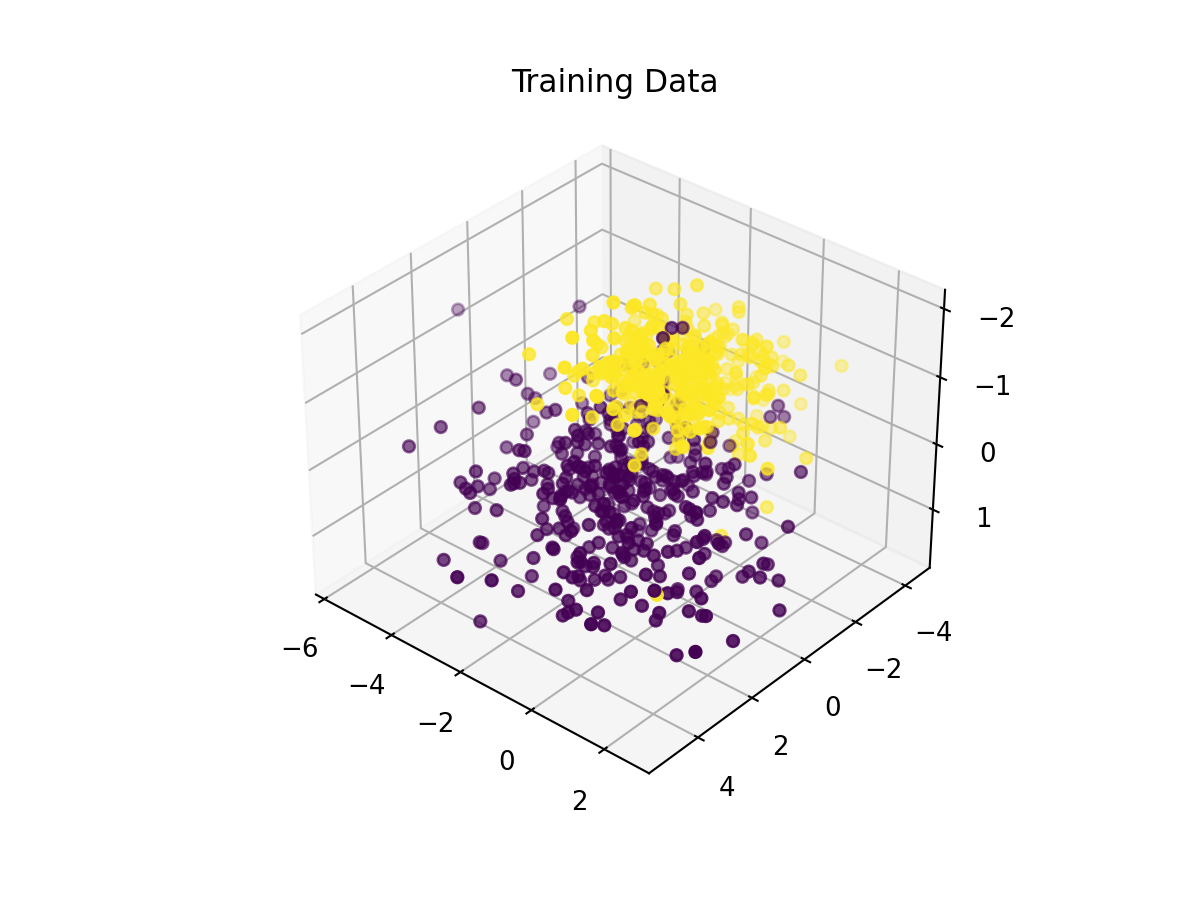

In [20]:
# display the new classes in terms of the first 3 features using an interactive 3d plot
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_2_train[:,0], X_2_train[:,1], X_2_train[:,2], c = Y_2_train)
plt.title('Training Data')
plt.show()

In [21]:
%%time
scikit_clf_fit_score(X_2_train, Y_2_train, X_2_test, Y_2_test, 2)

Logistic Regression: 0.928
Decision Tree Classifier: 0.92
Linear SVC: 0.928
KNN Classifier: 0.944
Random Forest Classifier: 0.944
Gradient Boosting Classfier: 0.948
Wall time: 831 ms


In [22]:
%%time
keras_nn_fit_score(X_2_train, Y_2_train, X_2_test, Y_2_test, 2)

Epoch 1/50
24/24 [==============================] - 0s 3ms/step - loss: 0.5424 - binary_accuracy: 0.8493
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 0.3890 - binary_accuracy: 0.9040
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: 0.3001 - binary_accuracy: 0.9147
Epoch 4/50
24/24 [==============================] - 0s 3ms/step - loss: 0.2462 - binary_accuracy: 0.9267
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2161 - binary_accuracy: 0.9333
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2012 - binary_accuracy: 0.9347
Epoch 7/50
24/24 [==============================] - 0s 2ms/step - loss: 0.1914 - binary_accuracy: 0.9320
Epoch 8/50
24/24 [==============================] - 0s 2ms/step - loss: 0.1850 - binary_accuracy: 0.9347
Epoch 9/50
24/24 [==============================] - 0s 3ms/step - loss: 0.1840 - binary_accuracy: 0.9307
Epoch 10/50
24/24 [==============================] - 0s

In [23]:
%%time
pytorch_nn_fit_score(X_2_train, Y_2_train, X_2_test, Y_2_test, 2)

PyTorch model training...
Epoch: 1, training loss: 0.2585797591182358
Epoch: 2, training loss: 0.18495293607893298
Epoch: 3, training loss: 0.17877721774041516
Epoch: 4, training loss: 0.17331572609896018
Epoch: 5, training loss: 0.16914687655770733
Epoch: 6, training loss: 0.1664540774401587
Epoch: 7, training loss: 0.1633263287883018
Epoch: 8, training loss: 0.1609979136969795
Epoch: 9, training loss: 0.1586948896345263
Epoch: 10, training loss: 0.1567669862396979
Epoch: 11, training loss: 0.15483713999943907
Epoch: 12, training loss: 0.15305883610141477
Epoch: 13, training loss: 0.15148294226279346
Epoch: 14, training loss: 0.14993302471719855
Epoch: 15, training loss: 0.1484870303887835
Epoch: 16, training loss: 0.14727450578063975
Epoch: 17, training loss: 0.14560122671200948
Epoch: 18, training loss: 0.14395221672646596
Epoch: 19, training loss: 0.14275488164998754
Epoch: 20, training loss: 0.14111894898982202
Epoch: 21, training loss: 0.1395748841789189
Epoch: 22, training loss:

In [24]:
accuracy_df

Dataset 1 Dataset 2 Dataset 3 Dataset 4 Dataset 5
Logistic Regression             0.928     0.928       NaN       NaN       NaN
Decision Tree Classifier         0.94      0.92       NaN       NaN       NaN
Linear SVC                      0.928     0.928       NaN       NaN       NaN
KNN Classifier                  0.952     0.944       NaN       NaN       NaN
Random Forest Classifier        0.948     0.944       NaN       NaN       NaN
Gradient Boosting Classfier     0.952     0.948       NaN       NaN       NaN
Keras NN                        0.944     0.948       NaN       NaN       NaN
PyTorch NN                      0.956     0.956       NaN       NaN       NaN

All models achieved over 90% accuracy again.

For the next dataset, I will use 7 features broken down into 4 informative, 2 redundant (linear combinations of informative features), and 1 repeated (randomly chosen from the previous 6).

In [25]:
X_3, Y_3 = make_classification(n_samples = 1000,
                           n_features = 7,
                           n_informative = 4,
                           n_redundant = 2,
                           n_repeated = 1,
                           n_clusters_per_class = 1,
                           random_state = 47)

X_3_train, X_3_test, Y_3_train, Y_3_test = train_test_split(X_3, Y_3, 
                                                            test_size = 0.25,
                                                            random_state = 47)

In [26]:
%%time
scikit_clf_fit_score(X_3_train, Y_3_train, X_3_test, Y_3_test, 3)

Logistic Regression: 0.884
Decision Tree Classifier: 0.872
Linear SVC: 0.88
KNN Classifier: 0.9
Random Forest Classifier: 0.896
Gradient Boosting Classfier: 0.892
Wall time: 871 ms


In [27]:
%%time
keras_nn_fit_score(X_3_train, Y_3_train, X_3_test, Y_3_test, 3)

Epoch 1/50
24/24 [==============================] - 0s 2ms/step - loss: 0.6744 - binary_accuracy: 0.5853
Epoch 2/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4666 - binary_accuracy: 0.8653
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: 0.3386 - binary_accuracy: 0.9027
Epoch 4/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2742 - binary_accuracy: 0.9053
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2463 - binary_accuracy: 0.9093
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2295 - binary_accuracy: 0.9160
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2204 - binary_accuracy: 0.9120
Epoch 8/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2135 - binary_accuracy: 0.9120
Epoch 9/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2101 - binary_accuracy: 0.9160
Epoch 10/50
24/24 [==============================] - 0s

In [28]:
%%time
pytorch_nn_fit_score(X_3_train, Y_3_train, X_3_test, Y_3_test, 3)

PyTorch model training...
Epoch: 1, training loss: 0.3322733322146814
Epoch: 2, training loss: 0.21504742804074584
Epoch: 3, training loss: 0.20234530242548984
Epoch: 4, training loss: 0.19472369203223813
Epoch: 5, training loss: 0.19034472553968498
Epoch: 6, training loss: 0.1870505321500835
Epoch: 7, training loss: 0.18513465805818122
Epoch: 8, training loss: 0.1822222388778564
Epoch: 9, training loss: 0.18025510034383901
Epoch: 10, training loss: 0.17874977075452314
Epoch: 11, training loss: 0.17729386006557646
Epoch: 12, training loss: 0.175706499480694
Epoch: 13, training loss: 0.17428510155594418
Epoch: 14, training loss: 0.17257758907700016
Epoch: 15, training loss: 0.17149425095404558
Epoch: 16, training loss: 0.17013869534687492
Epoch: 17, training loss: 0.16857430681344135
Epoch: 18, training loss: 0.1676021824867862
Epoch: 19, training loss: 0.1668627060206988
Epoch: 20, training loss: 0.1662533108433054
Epoch: 21, training loss: 0.16457280711568606
Epoch: 22, training loss:

In [29]:
accuracy_df

Dataset 1 Dataset 2 Dataset 3 Dataset 4 Dataset 5
Logistic Regression             0.928     0.928     0.884       NaN       NaN
Decision Tree Classifier         0.94      0.92     0.872       NaN       NaN
Linear SVC                      0.928     0.928      0.88       NaN       NaN
KNN Classifier                  0.952     0.944       0.9       NaN       NaN
Random Forest Classifier        0.948     0.944     0.896       NaN       NaN
Gradient Boosting Classfier     0.952     0.948     0.892       NaN       NaN
Keras NN                        0.944     0.948     0.892       NaN       NaN
PyTorch NN                      0.956     0.956     0.904       NaN       NaN

In [30]:
X_4, Y_4 = make_classification(n_samples = 1000,
                           n_features = 10,
                           n_informative = 5,
                           n_redundant = 3,
                           n_repeated = 2,
                           n_clusters_per_class = 1,
                           random_state = 47)

X_4_train, X_4_test, Y_4_train, Y_4_test = train_test_split(X_4, Y_4, 
                                                            test_size = 0.25,
                                                            random_state = 47)

The next dataset will consist of 10 features with the following breakdown: 5 informative, 3 redundant, 2 repeated.

In [31]:
%%time
scikit_clf_fit_score(X_4_train, Y_4_train, X_4_test, Y_4_test, 4)

Logistic Regression: 0.88
Decision Tree Classifier: 0.928
Linear SVC: 0.88
KNN Classifier: 0.956
Random Forest Classifier: 0.952
Gradient Boosting Classfier: 0.952
Wall time: 1.06 s


In [32]:
%%time
keras_nn_fit_score(X_4_train, Y_4_train, X_4_test, Y_4_test, 4)

Epoch 1/50
24/24 [==============================] - 0s 2ms/step - loss: 0.4292 - binary_accuracy: 0.8360
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 0.3093 - binary_accuracy: 0.8853
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2637 - binary_accuracy: 0.9000
Epoch 4/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2361 - binary_accuracy: 0.9027
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2131 - binary_accuracy: 0.9200
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 0.1982 - binary_accuracy: 0.9213
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1844 - binary_accuracy: 0.9293
Epoch 8/50
24/24 [==============================] - 0s 2ms/step - loss: 0.1740 - binary_accuracy: 0.9333
Epoch 9/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1646 - binary_accuracy: 0.9400
Epoch 10/50
24/24 [==============================] - 0s

In [33]:
%%time
pytorch_nn_fit_score(X_4_train, Y_4_train, X_4_test, Y_4_test, 4)

PyTorch model training...
Epoch: 1, training loss: 0.33133741921220355
Epoch: 2, training loss: 0.18537492493937413
Epoch: 3, training loss: 0.15660159787658406
Epoch: 4, training loss: 0.14556163429486868
Epoch: 5, training loss: 0.14046985413462074
Epoch: 6, training loss: 0.13459557765107255
Epoch: 7, training loss: 0.13146832740992584
Epoch: 8, training loss: 0.12788058959451967
Epoch: 9, training loss: 0.12483348553132818
Epoch: 10, training loss: 0.12353585403464697
Epoch: 11, training loss: 0.12092962067946754
Epoch: 12, training loss: 0.11895232521190605
Epoch: 13, training loss: 0.11743041475507042
Epoch: 14, training loss: 0.1175151684085007
Epoch: 15, training loss: 0.11332933033044255
Epoch: 16, training loss: 0.11195481117025813
Epoch: 17, training loss: 0.1112268998650642
Epoch: 18, training loss: 0.10859417850414123
Epoch: 19, training loss: 0.10686417574960662
Epoch: 20, training loss: 0.10557969482544963
Epoch: 21, training loss: 0.10452228320994184
Epoch: 22, training

In [34]:
accuracy_df

Dataset 1 Dataset 2 Dataset 3 Dataset 4 Dataset 5
Logistic Regression             0.928     0.928     0.884      0.88       NaN
Decision Tree Classifier         0.94      0.92     0.872     0.928       NaN
Linear SVC                      0.928     0.928      0.88      0.88       NaN
KNN Classifier                  0.952     0.944       0.9     0.956       NaN
Random Forest Classifier        0.948     0.944     0.896     0.952       NaN
Gradient Boosting Classfier     0.952     0.948     0.892     0.952       NaN
Keras NN                        0.944     0.948     0.892     0.936       NaN
PyTorch NN                      0.956     0.956     0.904     0.944       NaN

In [35]:
X_5, Y_5 = make_classification(n_samples = 1000,
                           n_features = 20,
                           n_informative = 7,
                           n_redundant = 7,
                           n_repeated = 6,
                           n_clusters_per_class = 1,
                           random_state = 47)

X_5_train, X_5_test, Y_5_train, Y_5_test = train_test_split(X_5, Y_5, 
                                                            test_size = 0.25,
                                                            random_state = 47)

In [36]:
%%time
scikit_clf_fit_score(X_5_train, Y_5_train, X_5_test, Y_5_test, 5)

Logistic Regression: 0.96
Decision Tree Classifier: 0.936


C:\Users\metal\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear SVC: 0.96
KNN Classifier: 0.972
Random Forest Classifier: 0.968
Gradient Boosting Classfier: 0.968
Wall time: 1.58 s


In [37]:
%%time
keras_nn_fit_score(X_5_train, Y_5_train, X_5_test, Y_5_test, 5)

Epoch 1/50
24/24 [==============================] - 0s 2ms/step - loss: 0.4679 - binary_accuracy: 0.7747
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2578 - binary_accuracy: 0.9200
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: 0.1650 - binary_accuracy: 0.9760
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1161 - binary_accuracy: 0.9813
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.0901 - binary_accuracy: 0.9827
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.0776 - binary_accuracy: 0.9840
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 0.0701 - binary_accuracy: 0.9840
Epoch 8/50
24/24 [==============================] - 0s 2ms/step - loss: 0.0647 - binary_accuracy: 0.9867
Epoch 9/50
24/24 [==============================] - 0s 1ms/step - loss: 0.0605 - binary_accuracy: 0.9867
Epoch 10/50
24/24 [==============================] - 0s

In [38]:
%%time
pytorch_nn_fit_score(X_5_train, Y_5_train, X_5_test, Y_5_test, 5)

PyTorch model training...
Epoch: 1, training loss: 0.18822757375256424
Epoch: 2, training loss: 0.06713329678162802
Epoch: 3, training loss: 0.05782638121142217
Epoch: 4, training loss: 0.05311386471654117
Epoch: 5, training loss: 0.04687606781731116
Epoch: 6, training loss: 0.04295966481216535
Epoch: 7, training loss: 0.04015871995156398
Epoch: 8, training loss: 0.03769255910245632
Epoch: 9, training loss: 0.03584463603444361
Epoch: 10, training loss: 0.034644820609859586
Epoch: 11, training loss: 0.03669684140672896
Epoch: 12, training loss: 0.028335434309949486
Epoch: 13, training loss: 0.027683921046891803
Epoch: 14, training loss: 0.02717937736697515
Epoch: 15, training loss: 0.026330114902202807
Epoch: 16, training loss: 0.022975313159542567
Epoch: 17, training loss: 0.019555202489936658
Epoch: 18, training loss: 0.02095429746453025
Epoch: 19, training loss: 0.026973354352629163
Epoch: 20, training loss: 0.02052194630440344
Epoch: 21, training loss: 0.020715631081358765
Epoch: 22

In [39]:
accuracy_df

Dataset 1 Dataset 2 Dataset 3 Dataset 4 Dataset 5
Logistic Regression             0.928     0.928     0.884      0.88      0.96
Decision Tree Classifier         0.94      0.92     0.872     0.928     0.936
Linear SVC                      0.928     0.928      0.88      0.88      0.96
KNN Classifier                  0.952     0.944       0.9     0.956     0.972
Random Forest Classifier        0.948     0.944     0.896     0.952     0.968
Gradient Boosting Classfier     0.952     0.948     0.892     0.952     0.968
Keras NN                        0.944     0.948     0.892     0.936     0.972
PyTorch NN                      0.956     0.956     0.904     0.944      0.98

In [40]:
moon_accuracy_df = pd.DataFrame(columns = ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4', 'Dataset 5'])

In [41]:
from sklearn.datasets import make_moons

moon_X, moon_Y = make_moons(1000, noise = 0.1, random_state=47)

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(moon_X, moon_Y, 
                                                    test_size = 0.25, random_state = 47)

<IPython.core.display.Javascript object>


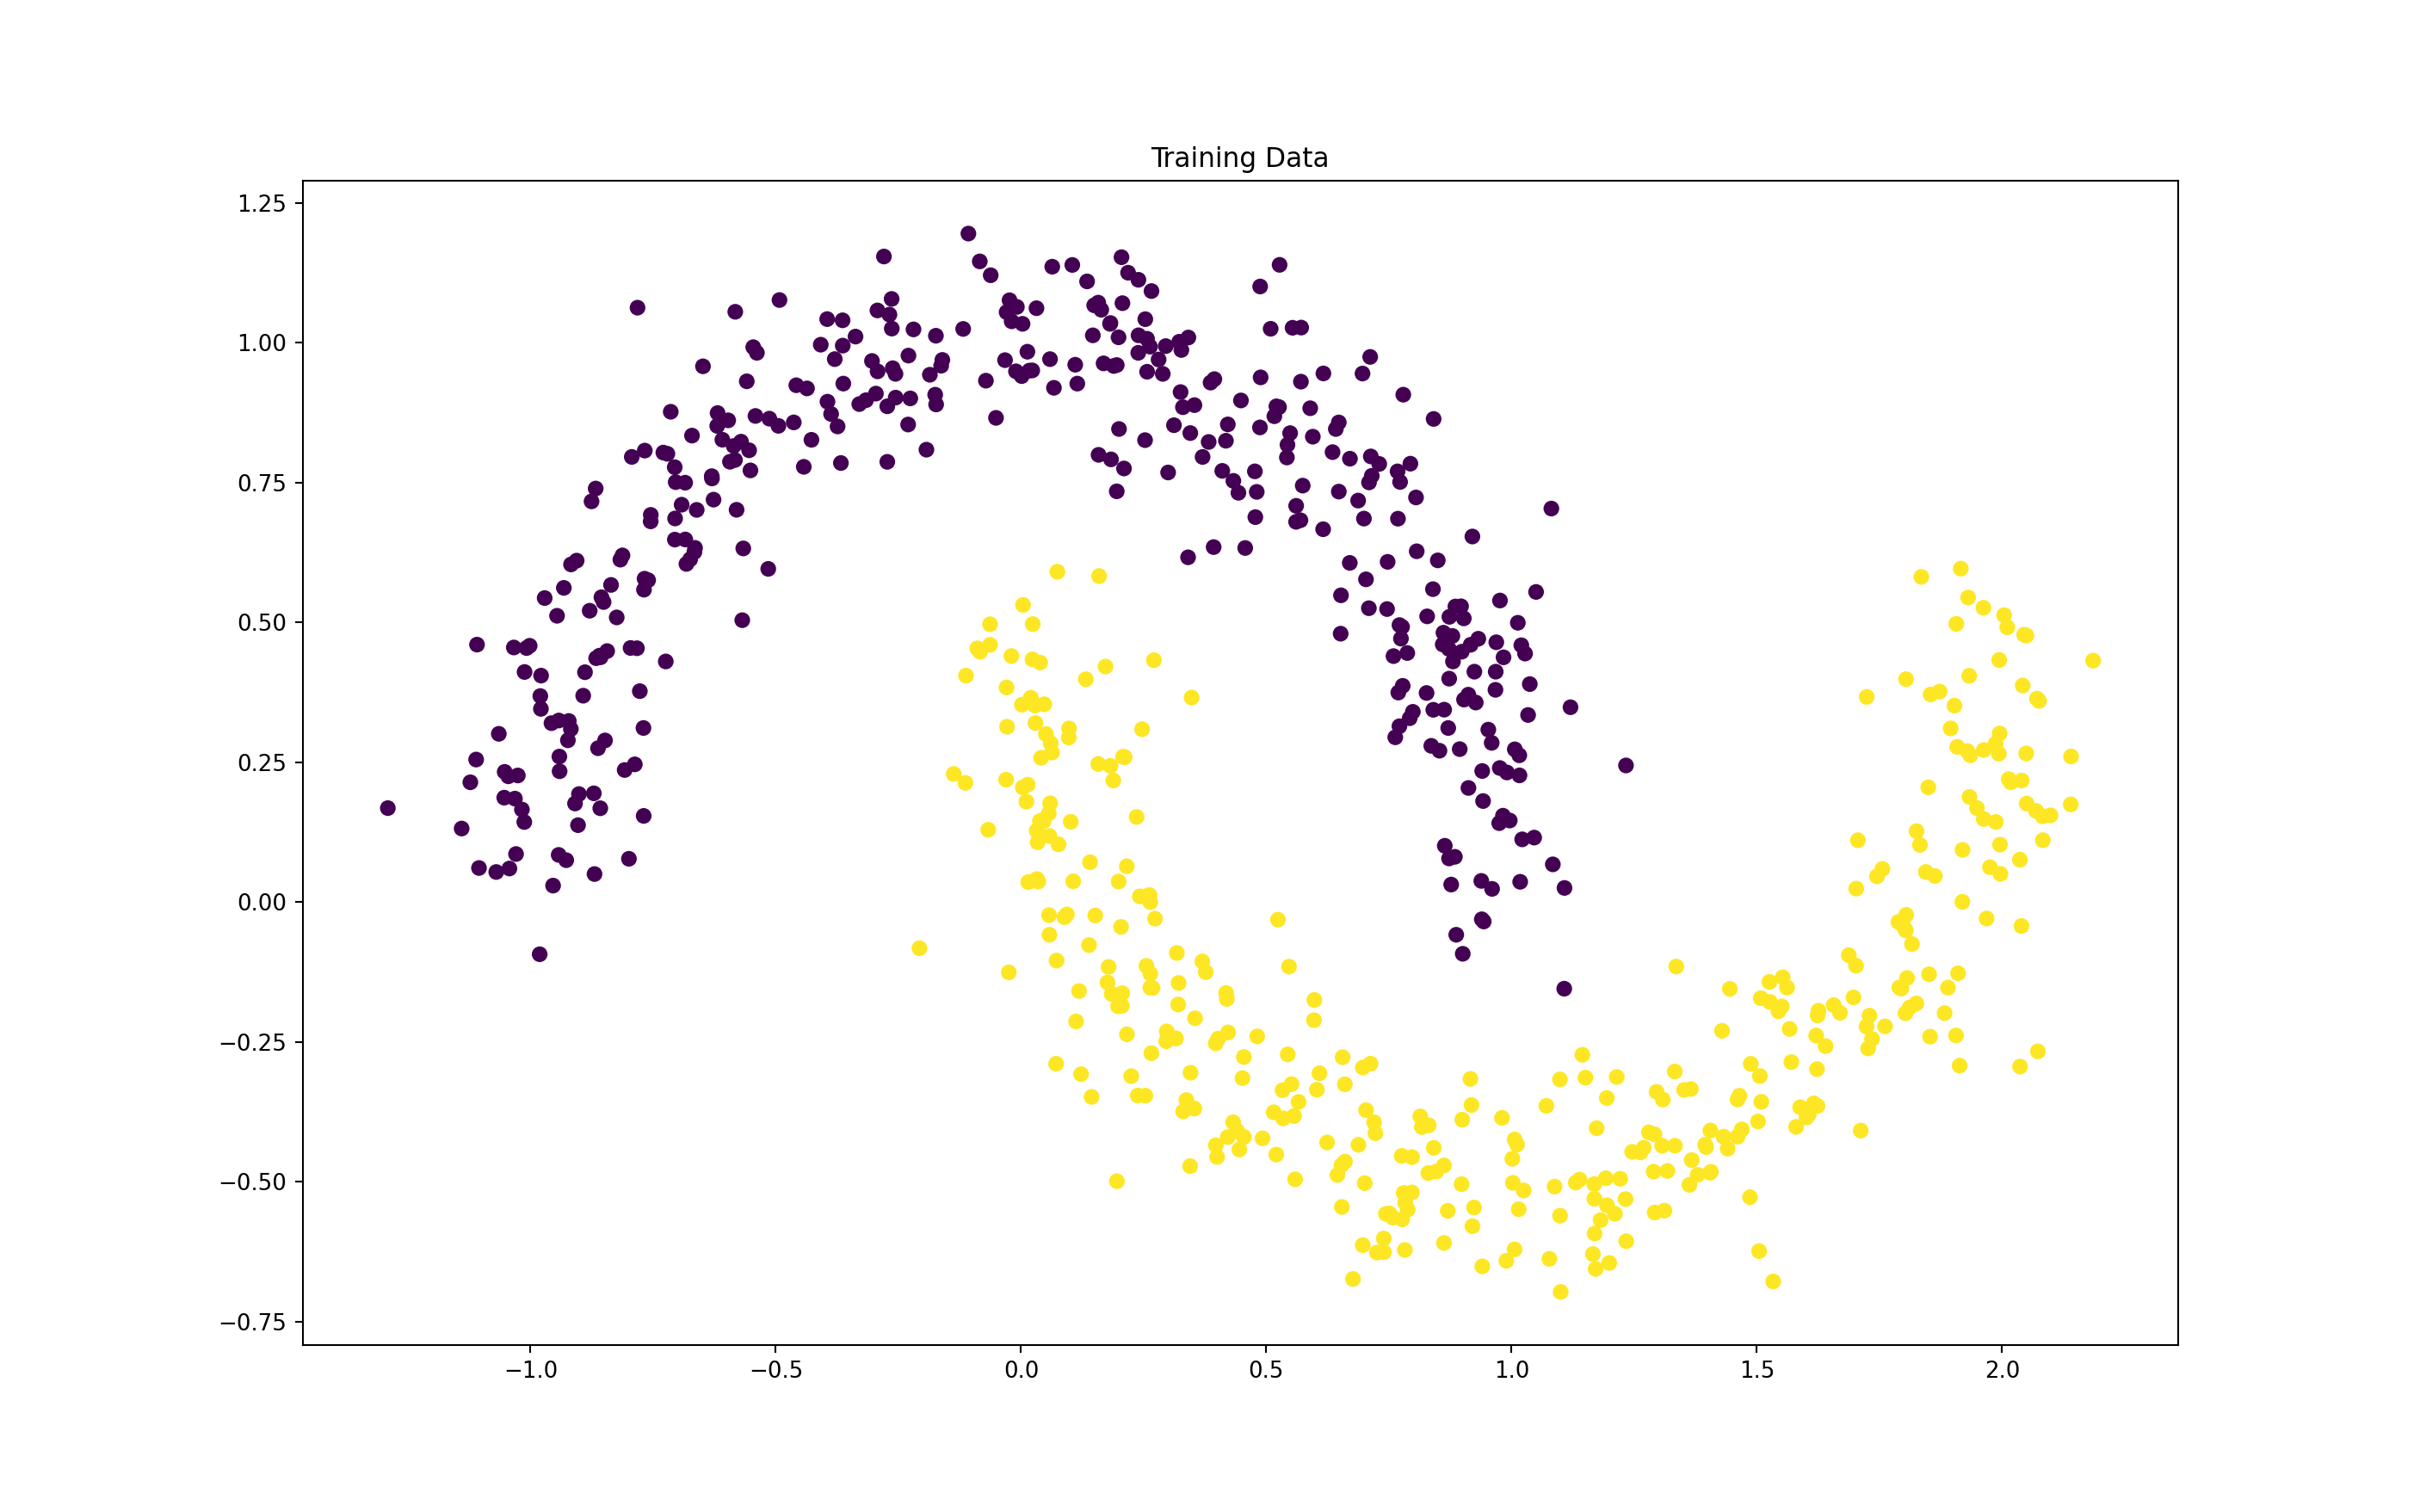

In [43]:
plt.figure(figsize=(8,5))
plt.scatter(X_train[:,0], X_train[:,1], c = Y_train)
plt.title('Training Data')
plt.show()

<IPython.core.display.Javascript object>


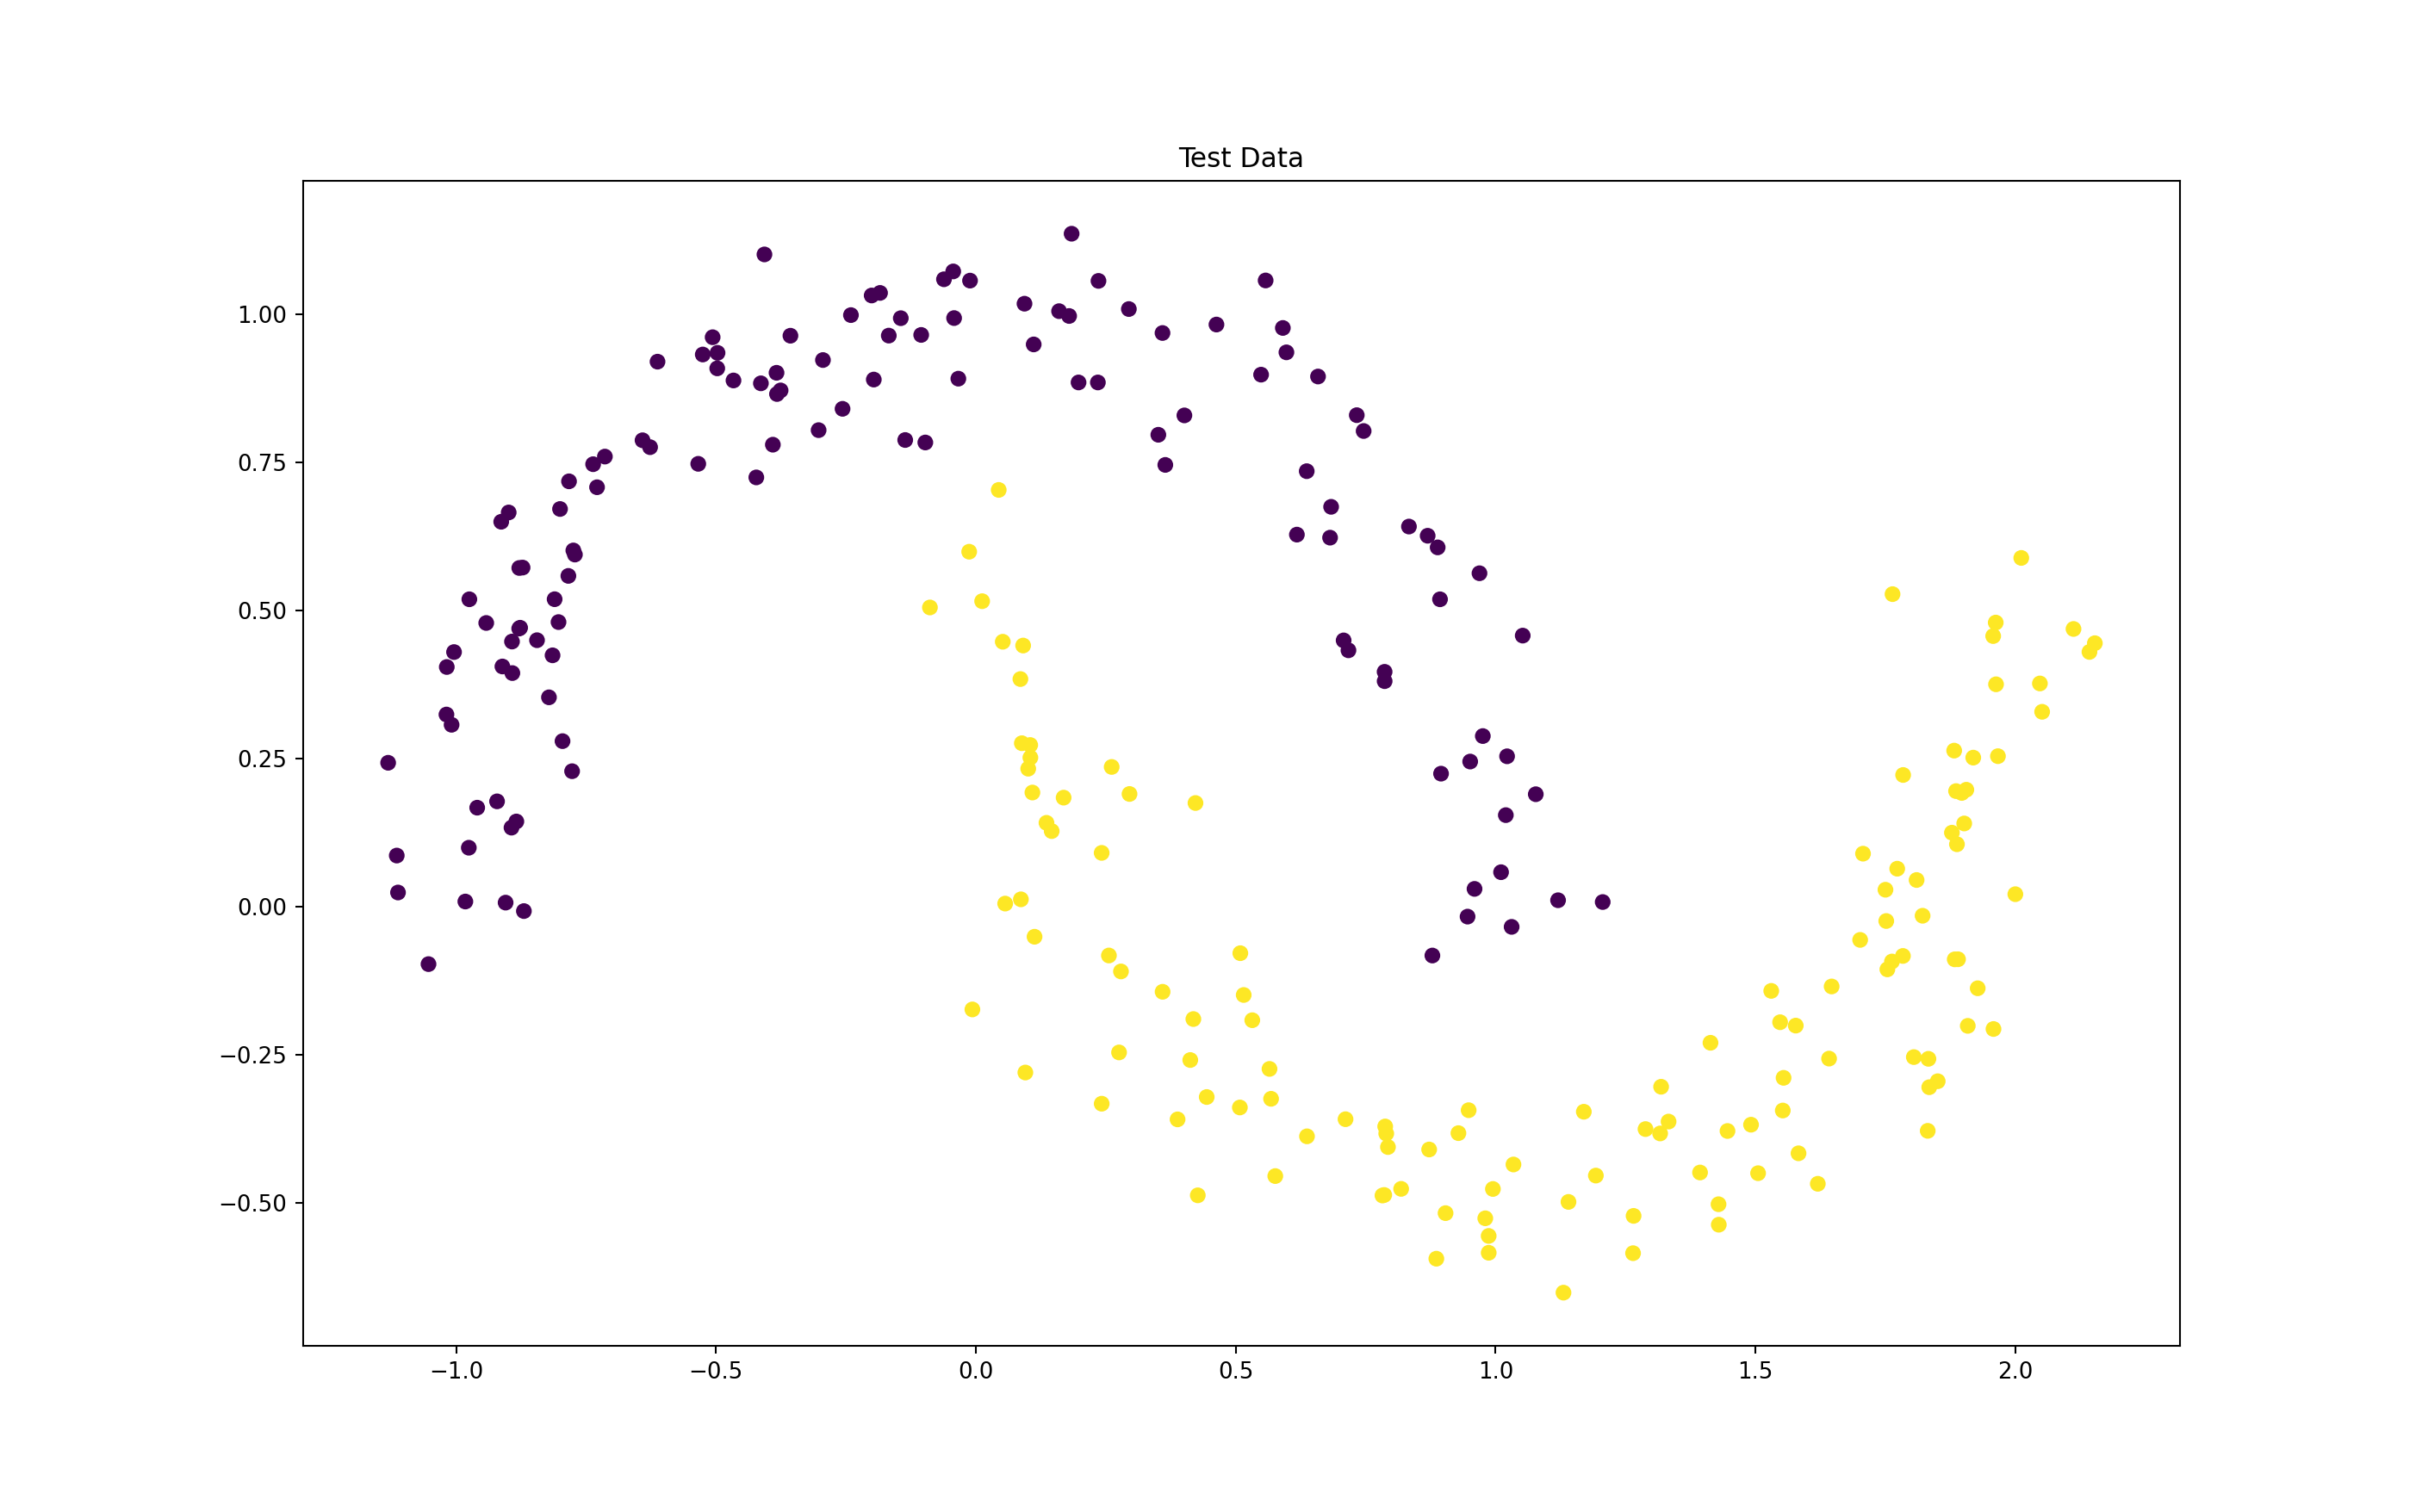

In [44]:
plt.figure(figsize=(8,5))
plt.scatter(X_test[:,0], X_test[:,1], c = Y_test)
plt.title('Test Data')
plt.show()

In [45]:
# modify the functions to use the new DataFrame

def moon_scikit_clf_fit_score(x_train, y_train, x_test, y_test, dataset_num):
    
    # loop over each classifier in clf_list, fit, score, add score to accuracy_df
    dataset = f'Dataset {dataset_num}'
    
    for i in range(6):
        clf_list[i].fit(x_train, y_train)
        score = clf_list[i].score(x_test, y_test)
        moon_accuracy_df.loc[clf_names[i], dataset] = score
        print(f'{clf_names[i]}: {score}')

In [46]:
def moon_keras_nn_fit_score(x_train, y_train, x_test, y_test, dataset_num, n_epochs = 50):
    
    dataset = f'Dataset {dataset_num}'
    
    # three layer model with ReLU applied to the first two layers
    # and sigmoid to the last one
    model = Sequential([
    Dense(30, input_shape=(x_train.shape[1],), activation = 'relu'),
    Dense(30, activation = 'relu'),
    Dense(1, activation = 'sigmoid')])
    
    # compile the model using binary crossentropy as the loss function and
    # binary accuracy as the evaluation metric
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
    model.fit(x_train, y_train, epochs = n_epochs)
    
    # evaluate using the test data
    results = model.evaluate(x_test, y_test)
    moon_accuracy_df.loc['Keras NN', dataset] = float(f'{results[1]:.3}')
    print(results)

In [47]:
def moon_pytorch_nn_fit_score(x_train, y_train, x_test, y_test, dataset_num, n_epochs = 50):
    
    dataset = f'Dataset {dataset_num}'
    
    # initialize a neural network
    net = TorchBinaryClassifier(x_train.shape[1])
    
    # get data loaders from the training and testing data
    train_loader, test_loader = pytorch_loaders(x_train, y_train, x_test, y_test)
    
    # train the network
    pytorch_train(net, train_loader)
    
    # add a blank line for a clearer print-out
    print('\n')
    # test the network
    accuracy = pytorch_test(net, test_loader)
    moon_accuracy_df.loc['PyTorch NN', dataset] = accuracy

In [48]:
%%time
moon_scikit_clf_fit_score(X_train, Y_train, X_test, Y_test, 1)

Logistic Regression: 0.88
Decision Tree Classifier: 0.992
Linear SVC: 0.88
KNN Classifier: 0.996
Random Forest Classifier: 0.988
Gradient Boosting Classfier: 0.992
Wall time: 626 ms


In [49]:
%%time
moon_keras_nn_fit_score(X_train, Y_train, X_test, Y_test, 1)

Epoch 1/50
24/24 [==============================] - 0s 1ms/step - loss: 0.5977 - binary_accuracy: 0.7440
Epoch 2/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4942 - binary_accuracy: 0.7987
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4108 - binary_accuracy: 0.8107
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3498 - binary_accuracy: 0.8427
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3122 - binary_accuracy: 0.8707
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 0.2875 - binary_accuracy: 0.8720
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2690 - binary_accuracy: 0.8853
Epoch 8/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2515 - binary_accuracy: 0.8813
Epoch 9/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2385 - binary_accuracy: 0.8920
Epoch 10/50
24/24 [==============================] - 0s

In [50]:
%%time
moon_pytorch_nn_fit_score(X_train, Y_train, X_test, Y_test, 1)

PyTorch model training...
Epoch: 1, training loss: 0.3504152833248178
Epoch: 2, training loss: 0.11856645760518343
Epoch: 3, training loss: 0.0533559164593377
Epoch: 4, training loss: 0.028906248923785523
Epoch: 5, training loss: 0.018470403140069095
Epoch: 6, training loss: 0.01330293576703561
Epoch: 7, training loss: 0.010098288073764537
Epoch: 8, training loss: 0.008102742599142364
Epoch: 9, training loss: 0.006612198647332245
Epoch: 10, training loss: 0.0055648357781254085
Epoch: 11, training loss: 0.0048325872007020316
Epoch: 12, training loss: 0.004116513795926607
Epoch: 13, training loss: 0.0036041753970502176
Epoch: 14, training loss: 0.003206475941290042
Epoch: 15, training loss: 0.0029620290320703287
Epoch: 16, training loss: 0.002681827772260533
Epoch: 17, training loss: 0.0024021697117919604
Epoch: 18, training loss: 0.0022923966334382345
Epoch: 19, training loss: 0.002186439540309929
Epoch: 20, training loss: 0.0020803478564524955
Epoch: 21, training loss: 0.00195526996018

In [51]:
moon_accuracy_df

Dataset 1 Dataset 2 Dataset 3 Dataset 4 Dataset 5
Logistic Regression              0.88       NaN       NaN       NaN       NaN
Decision Tree Classifier        0.992       NaN       NaN       NaN       NaN
Linear SVC                       0.88       NaN       NaN       NaN       NaN
KNN Classifier                  0.996       NaN       NaN       NaN       NaN
Random Forest Classifier        0.988       NaN       NaN       NaN       NaN
Gradient Boosting Classfier     0.992       NaN       NaN       NaN       NaN
Keras NN                        0.992       NaN       NaN       NaN       NaN
PyTorch NN                      0.996       NaN       NaN       NaN       NaN

In [52]:
moon_X_2, moon_Y_2 = make_moons(1000, noise = 0.3, random_state=47)
X_train, X_test, Y_train, Y_test = train_test_split(moon_X_2, moon_Y_2, 
                                                    test_size = 0.25, random_state = 47)

<IPython.core.display.Javascript object>


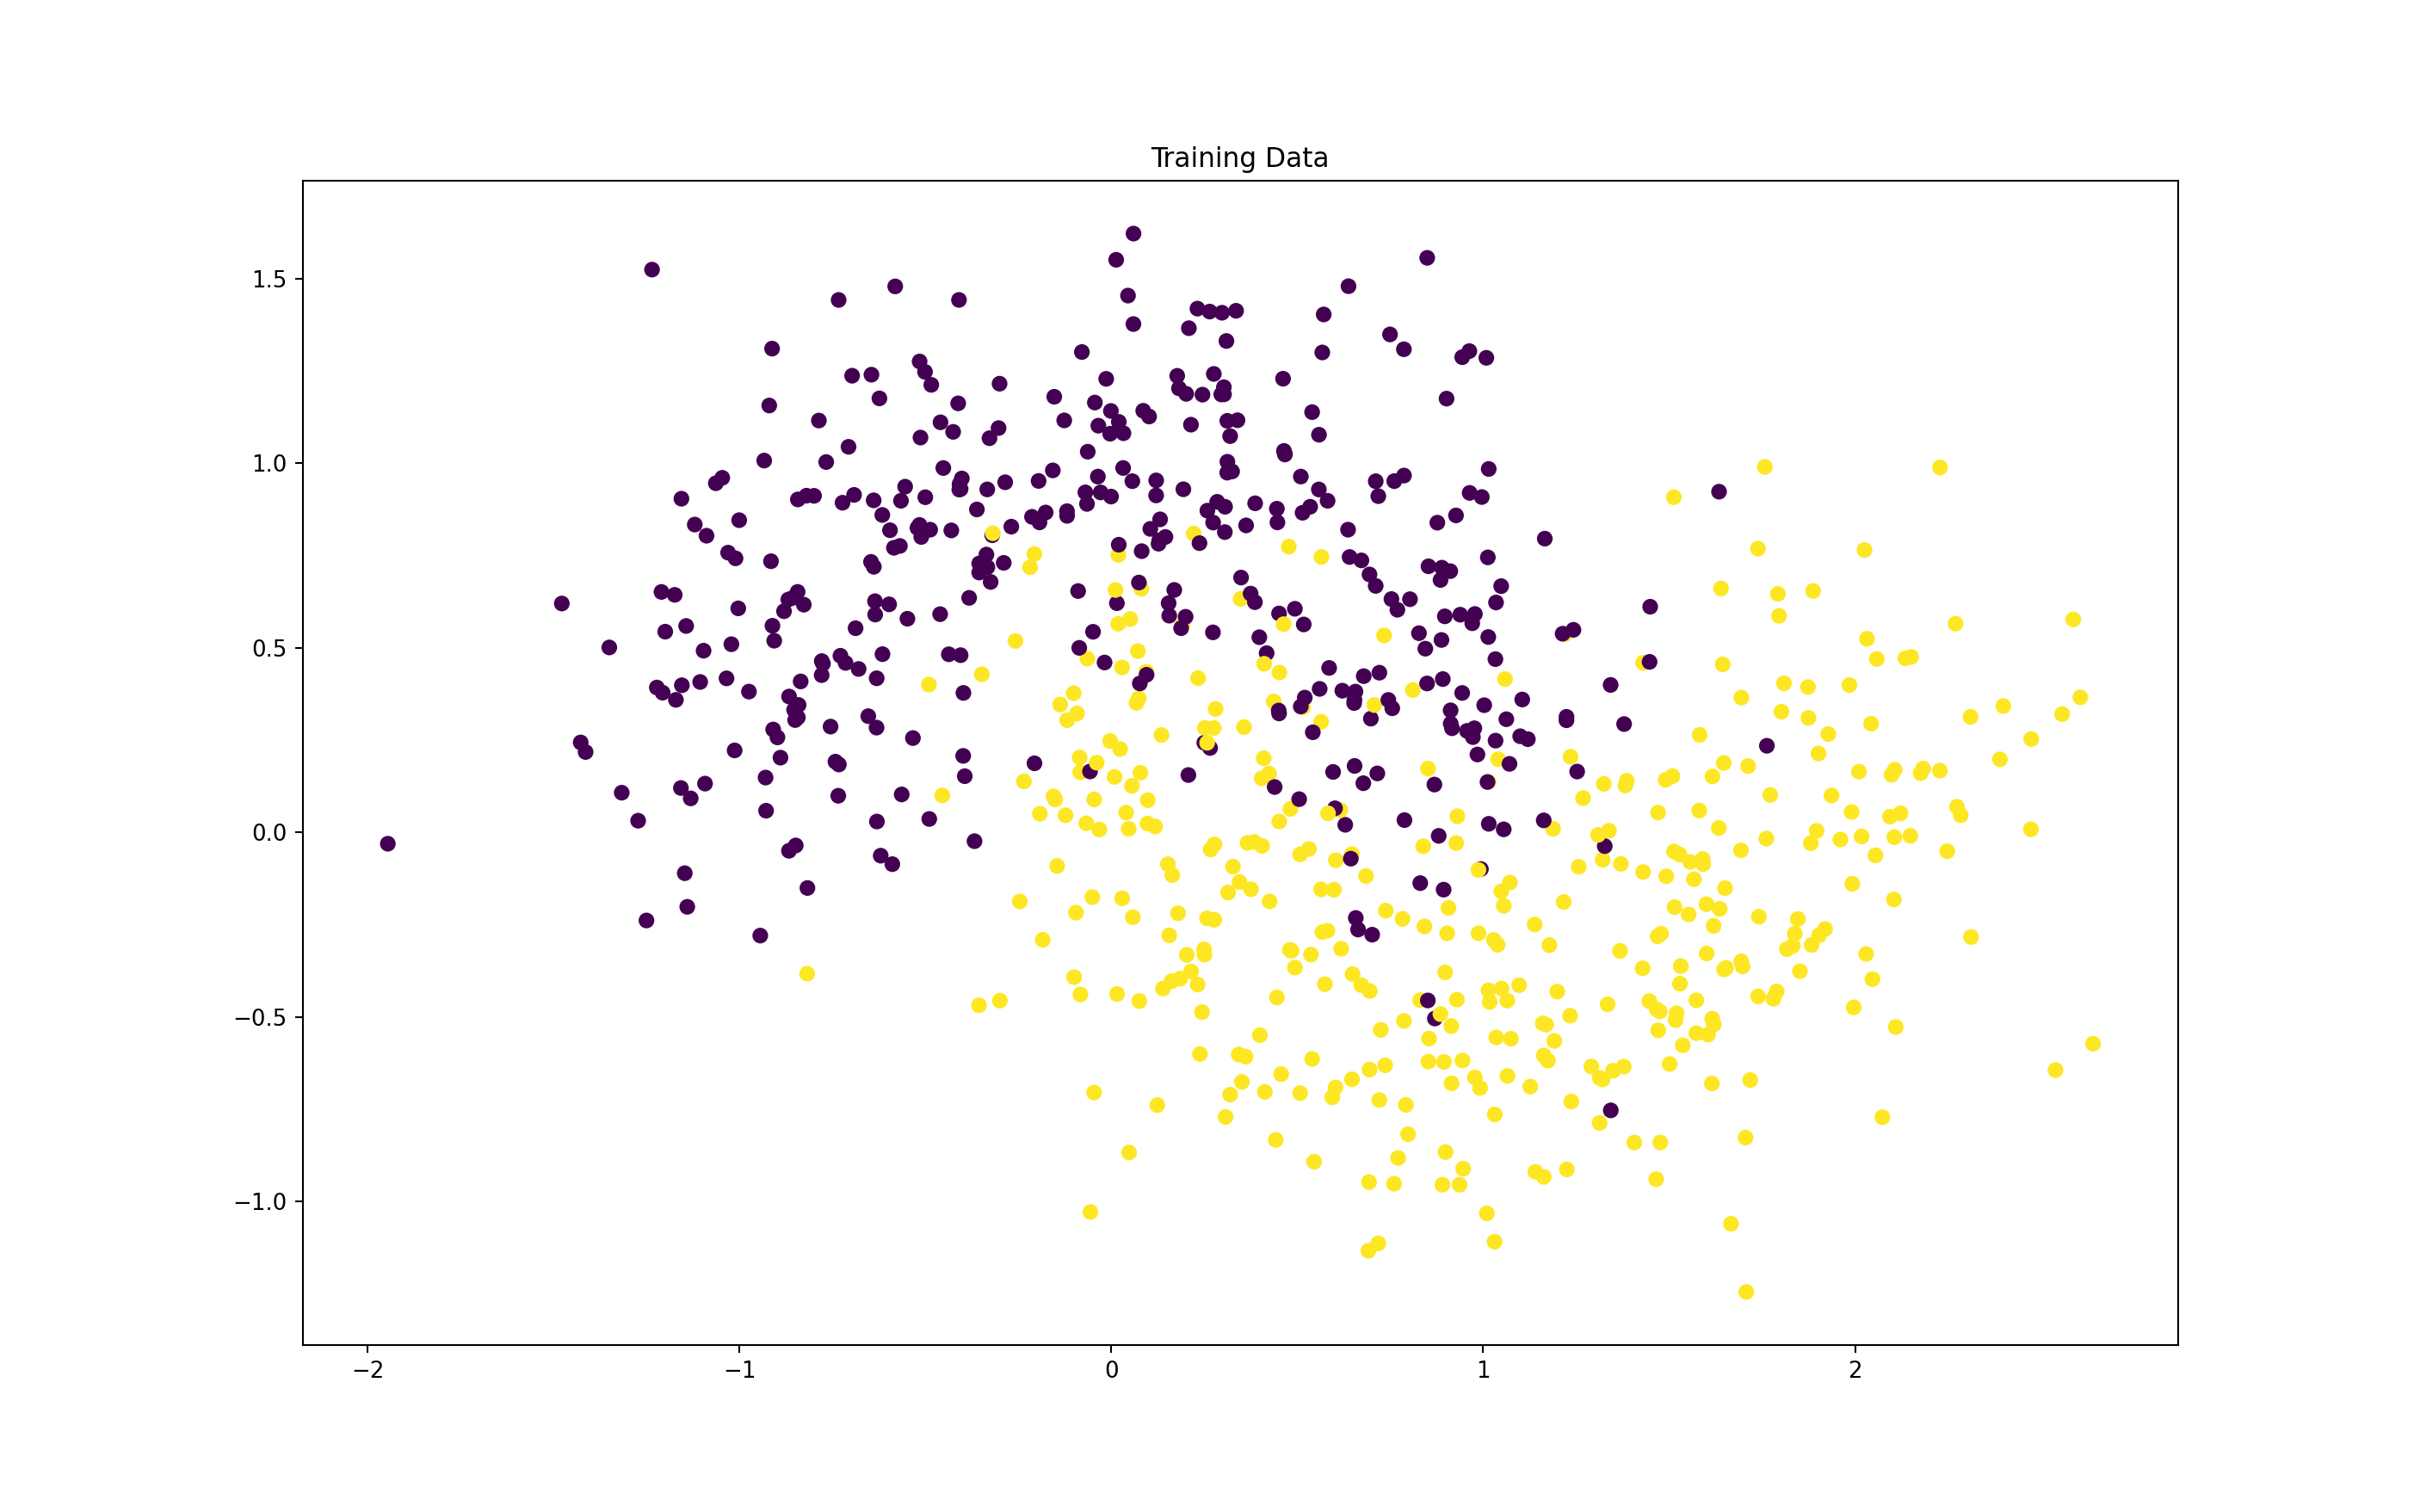

In [53]:
plt.figure(figsize=(8,5))
plt.scatter(X_train[:,0], X_train[:,1], c = Y_train)
plt.title('Training Data')
plt.show()

<IPython.core.display.Javascript object>


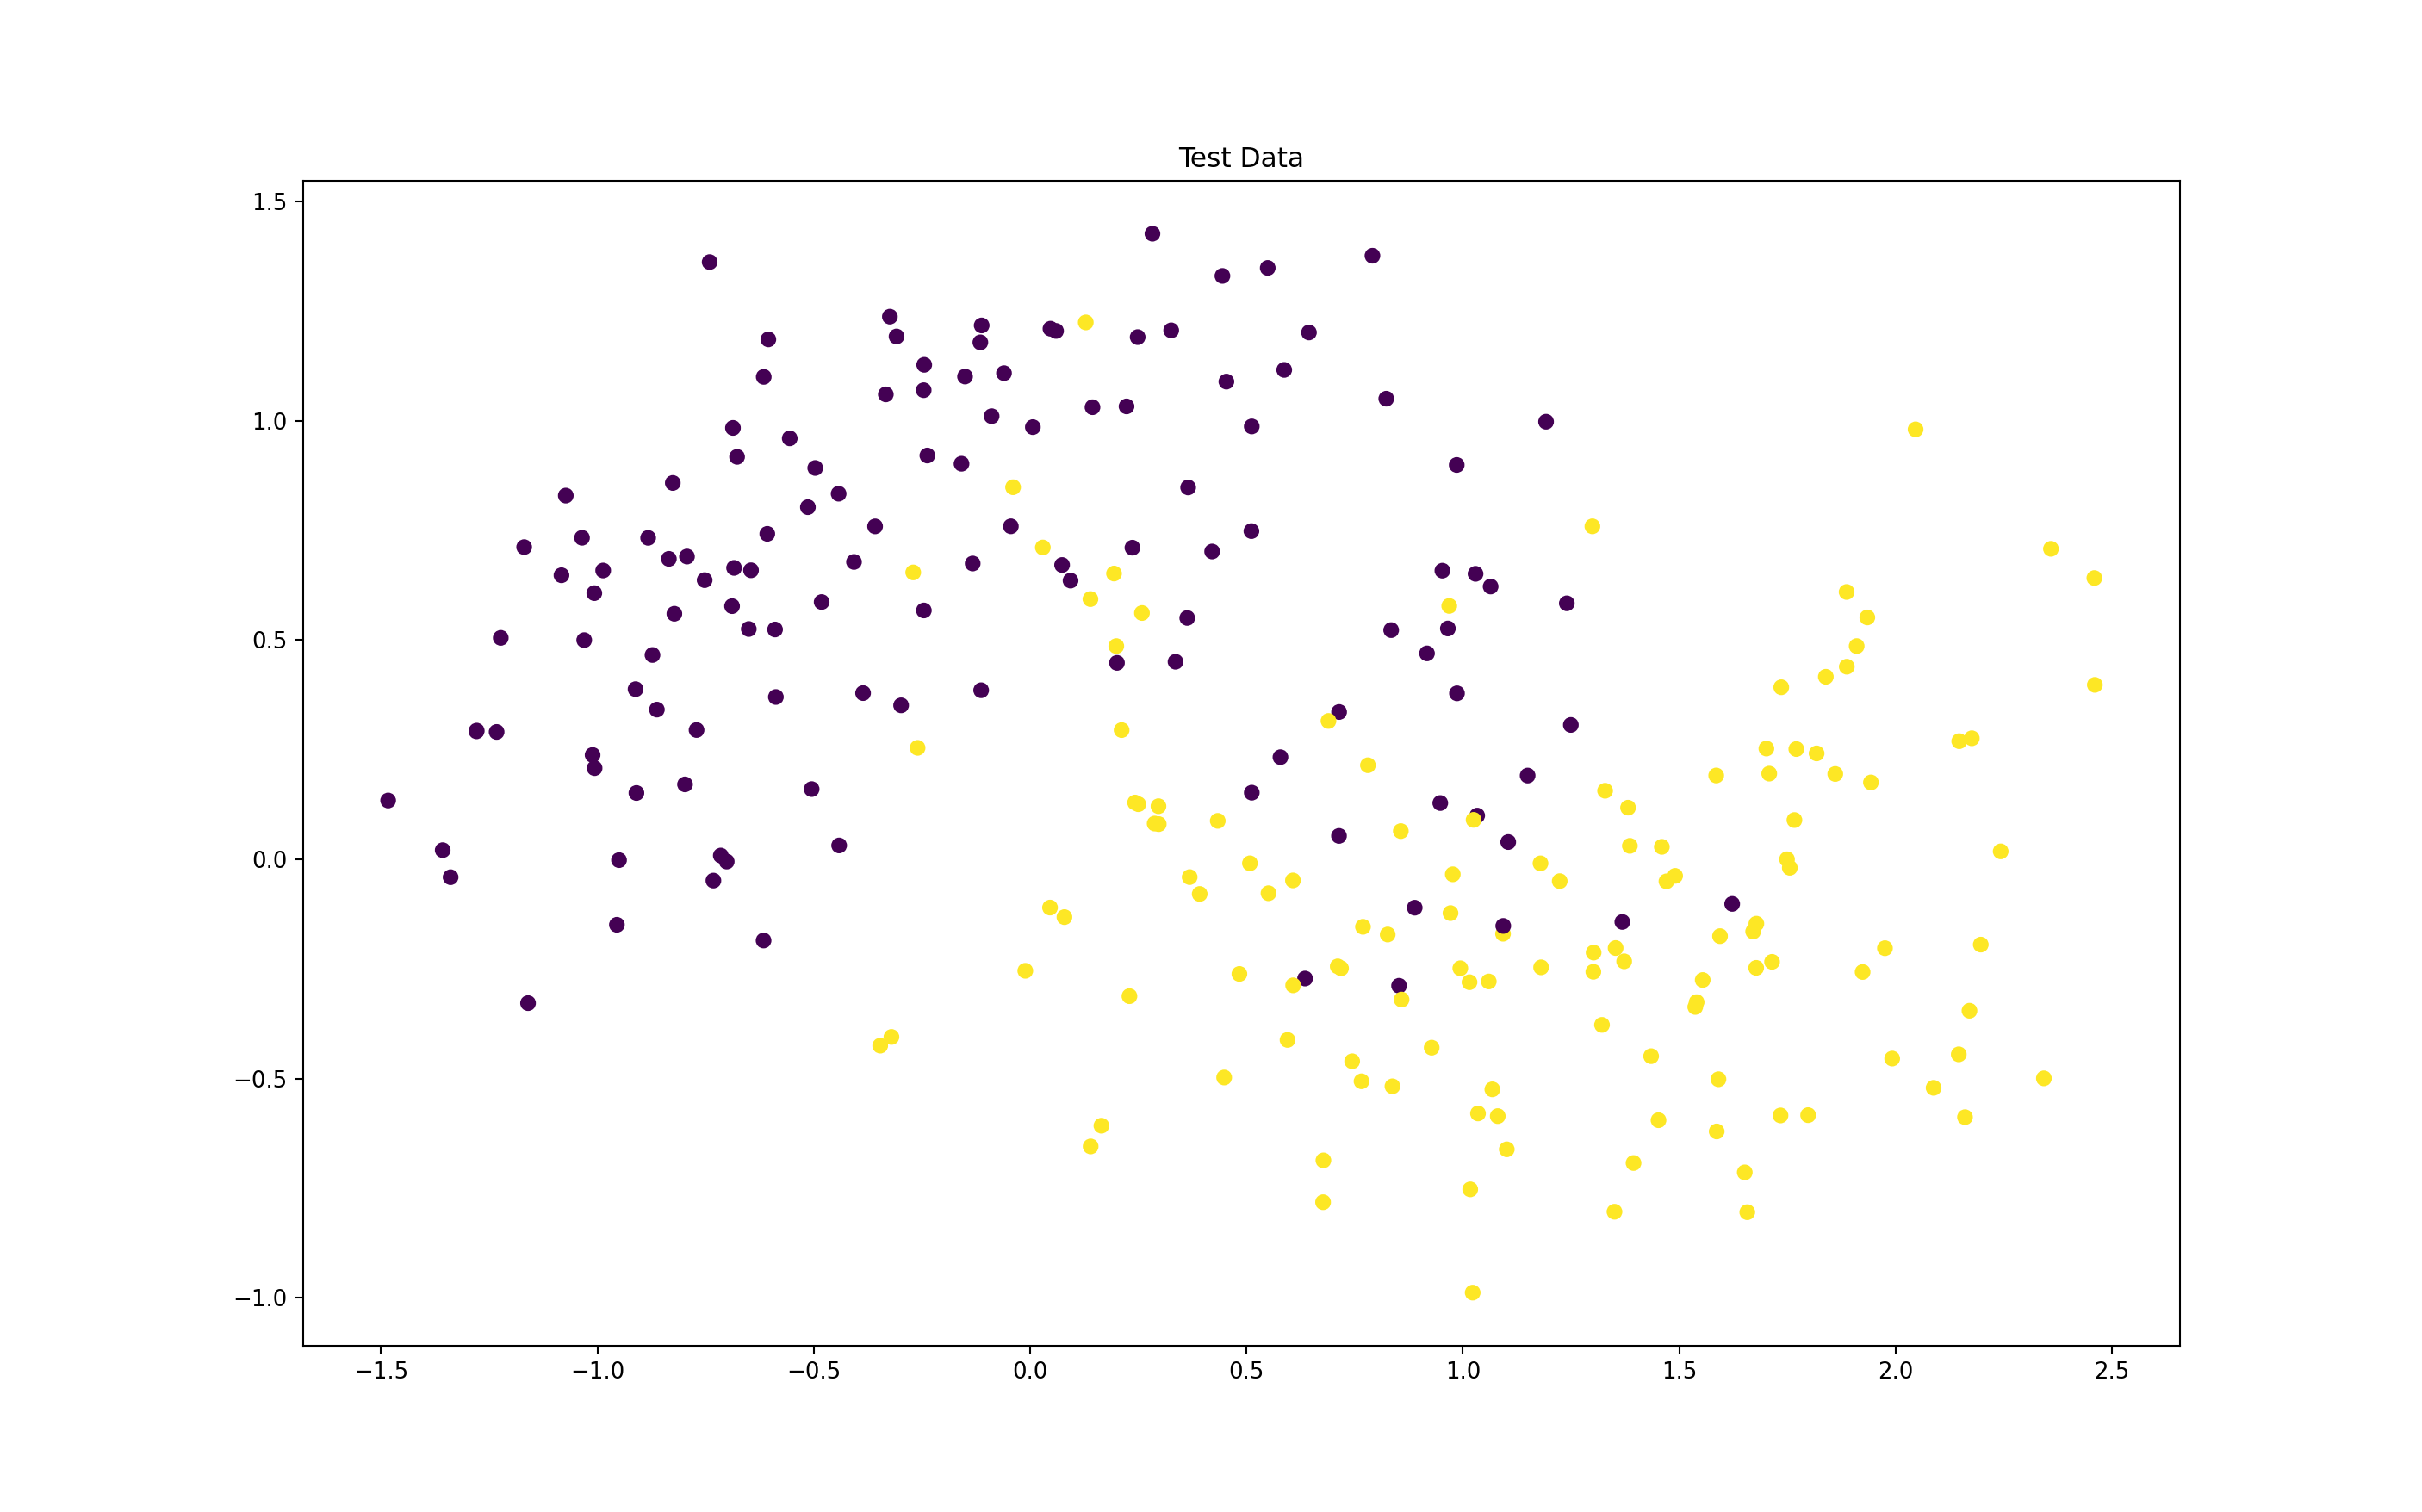

In [54]:
plt.figure(figsize=(8,5))
plt.scatter(X_test[:,0], X_test[:,1], c = Y_test)
plt.title('Test Data')
plt.show()

In [55]:
%%time
moon_scikit_clf_fit_score(X_train, Y_train, X_test, Y_test, 2)

Logistic Regression: 0.884
Decision Tree Classifier: 0.868
Linear SVC: 0.884
KNN Classifier: 0.888
Random Forest Classifier: 0.896
Gradient Boosting Classfier: 0.896
Wall time: 626 ms


In [56]:
%%time
moon_keras_nn_fit_score(X_train, Y_train, X_test, Y_test, 2)

Epoch 1/50
24/24 [==============================] - 0s 1ms/step - loss: 0.6550 - binary_accuracy: 0.7067
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 0.5597 - binary_accuracy: 0.7933
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4717 - binary_accuracy: 0.8227
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3957 - binary_accuracy: 0.8347
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3586 - binary_accuracy: 0.8373
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3423 - binary_accuracy: 0.8440
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3342 - binary_accuracy: 0.8453
Epoch 8/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3291 - binary_accuracy: 0.8480
Epoch 9/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3245 - binary_accuracy: 0.8453
Epoch 10/50
24/24 [==============================] - 0s

In [57]:
%%time
moon_pytorch_nn_fit_score(X_train, Y_train, X_test, Y_test, 2)

PyTorch model training...
Epoch: 1, training loss: 0.4133139321456353
Epoch: 2, training loss: 0.29740500343684106
Epoch: 3, training loss: 0.26830762397757885
Epoch: 4, training loss: 0.2510297061530776
Epoch: 5, training loss: 0.24216273653729878
Epoch: 6, training loss: 0.2374726209662743
Epoch: 7, training loss: 0.23465871252760795
Epoch: 8, training loss: 0.23296719437673952
Epoch: 9, training loss: 0.23175768542798597
Epoch: 10, training loss: 0.23113892685878304
Epoch: 11, training loss: 0.2305990872753464
Epoch: 12, training loss: 0.22989762750751924
Epoch: 13, training loss: 0.2295435169757778
Epoch: 14, training loss: 0.2294172200657434
Epoch: 15, training loss: 0.2290358252090191
Epoch: 16, training loss: 0.22874495639206058
Epoch: 17, training loss: 0.22880960039616577
Epoch: 18, training loss: 0.22836809683255646
Epoch: 19, training loss: 0.228300478374135
Epoch: 20, training loss: 0.2280262848414574
Epoch: 21, training loss: 0.22785091213975406
Epoch: 22, training loss: 0

In [58]:
moon_accuracy_df

Dataset 1 Dataset 2 Dataset 3 Dataset 4 Dataset 5
Logistic Regression              0.88     0.884       NaN       NaN       NaN
Decision Tree Classifier        0.992     0.868       NaN       NaN       NaN
Linear SVC                       0.88     0.884       NaN       NaN       NaN
KNN Classifier                  0.996     0.888       NaN       NaN       NaN
Random Forest Classifier        0.988     0.896       NaN       NaN       NaN
Gradient Boosting Classfier     0.992     0.896       NaN       NaN       NaN
Keras NN                        0.992     0.896       NaN       NaN       NaN
PyTorch NN                      0.996     0.896       NaN       NaN       NaN

In [59]:
moon_X_3, moon_Y_3 = make_moons(1000, noise = 0.5, random_state=47)
X_train, X_test, Y_train, Y_test = train_test_split(moon_X_3, moon_Y_3, 
                                                    test_size = 0.25, random_state = 47)

<IPython.core.display.Javascript object>


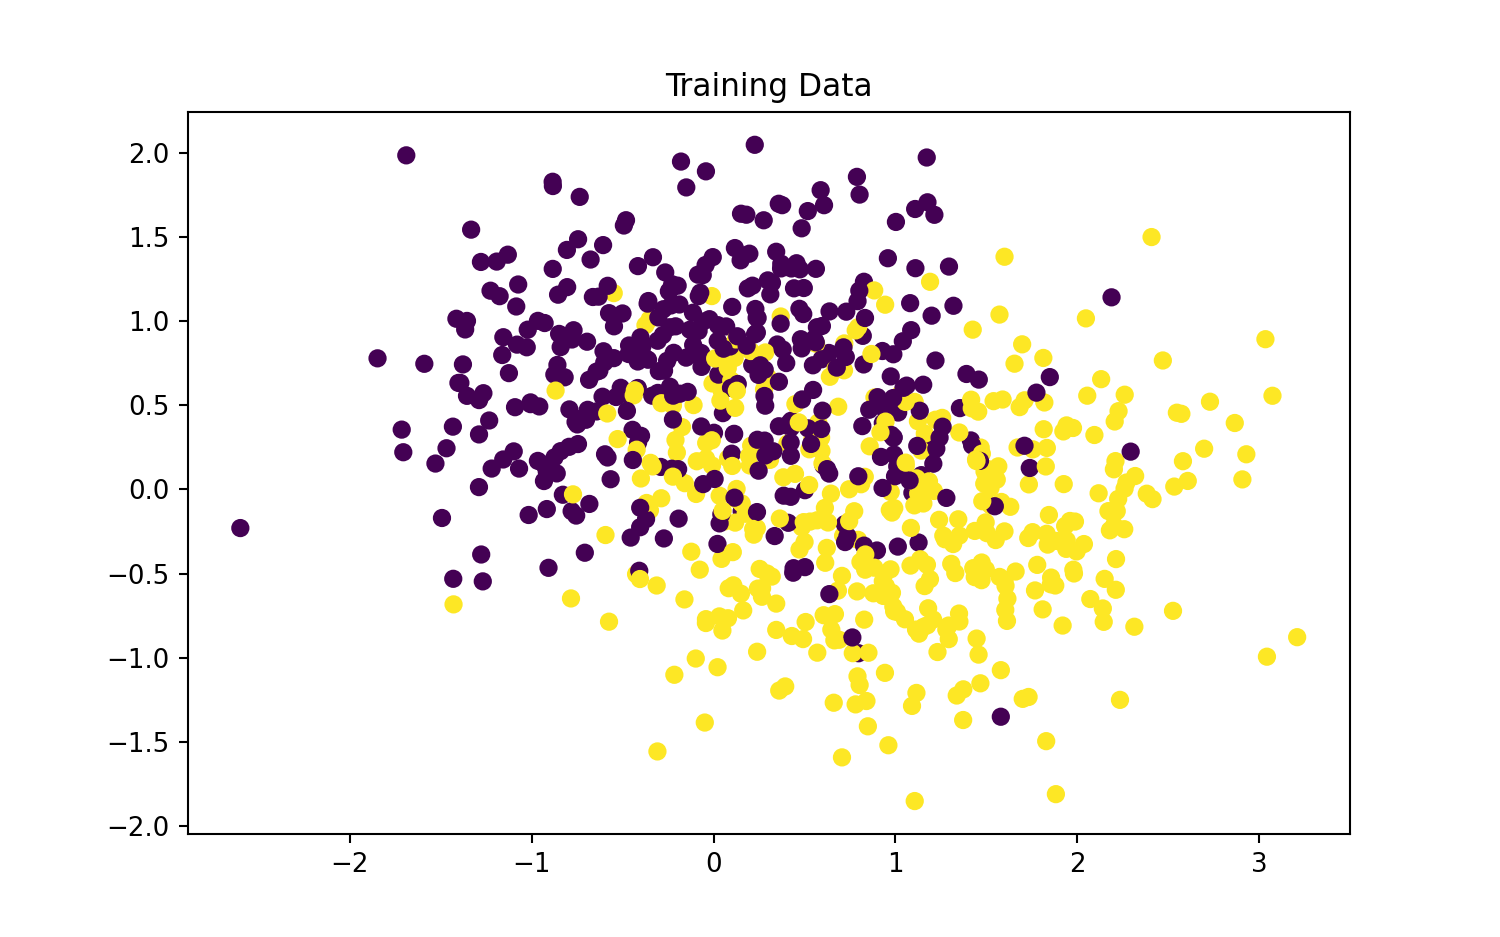

In [60]:
plt.figure(figsize=(8,5))
plt.scatter(X_train[:,0], X_train[:,1], c = Y_train)
plt.title('Training Data')
plt.show()

<IPython.core.display.Javascript object>


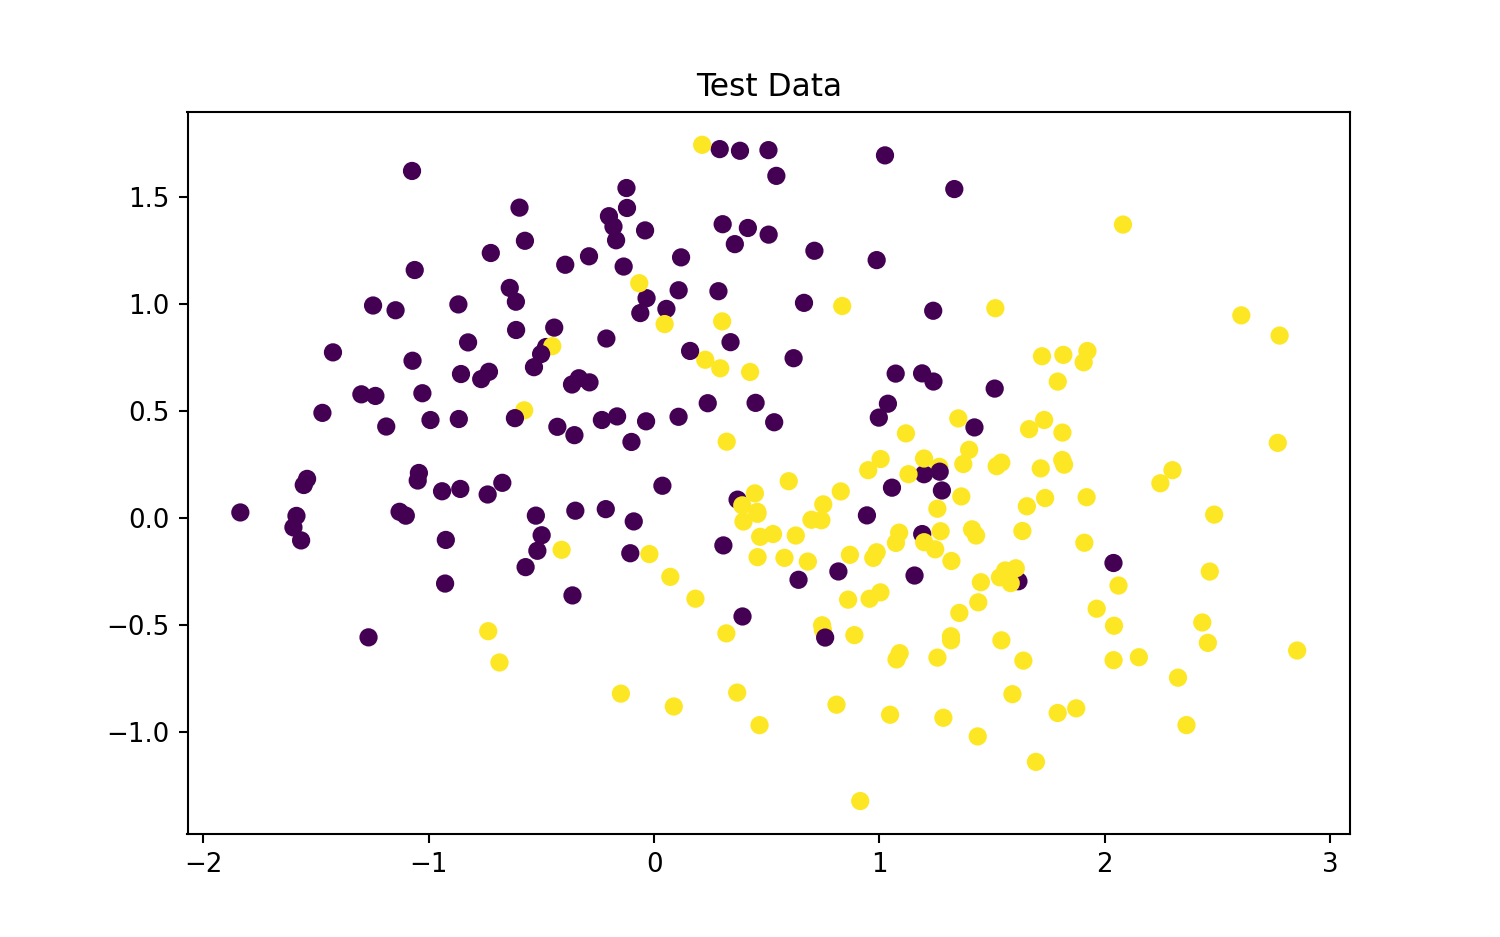

In [61]:
plt.figure(figsize=(8,5))
plt.scatter(X_test[:,0], X_test[:,1], c = Y_test)
plt.title('Test Data')
plt.show()

In [62]:
%%time
moon_scikit_clf_fit_score(X_train, Y_train, X_test, Y_test, 3)

Logistic Regression: 0.852
Decision Tree Classifier: 0.756
Linear SVC: 0.856
KNN Classifier: 0.828
Random Forest Classifier: 0.816
Gradient Boosting Classfier: 0.816
Wall time: 707 ms


In [63]:
%%time
moon_keras_nn_fit_score(X_train, Y_train, X_test, Y_test, 3)

Epoch 1/50
24/24 [==============================] - 0s 2ms/step - loss: 0.6085 - binary_accuracy: 0.7280
Epoch 2/50
24/24 [==============================] - 0s 1ms/step - loss: 0.5261 - binary_accuracy: 0.7827
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4767 - binary_accuracy: 0.7907
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4446 - binary_accuracy: 0.7973
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4284 - binary_accuracy: 0.8027
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4224 - binary_accuracy: 0.8000
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4187 - binary_accuracy: 0.8000
Epoch 8/50
24/24 [==============================] - 0s 2ms/step - loss: 0.4180 - binary_accuracy: 0.8000
Epoch 9/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4164 - binary_accuracy: 0.8013
Epoch 10/50
24/24 [==============================] - 0s

In [64]:
%%time
moon_pytorch_nn_fit_score(X_train, Y_train, X_test, Y_test, 3)

PyTorch model training...
Epoch: 1, training loss: 0.46927777417500816
Epoch: 2, training loss: 0.42084347299983105
Epoch: 3, training loss: 0.41468028829727943
Epoch: 4, training loss: 0.40994098780668964
Epoch: 5, training loss: 0.4065274909460374
Epoch: 6, training loss: 0.40390039774794906
Epoch: 7, training loss: 0.4016914907046982
Epoch: 8, training loss: 0.39994941762432185
Epoch: 9, training loss: 0.3987304850699535
Epoch: 10, training loss: 0.3975621362233166
Epoch: 11, training loss: 0.3967243492623529
Epoch: 12, training loss: 0.3963482995729719
Epoch: 13, training loss: 0.3956907084235669
Epoch: 14, training loss: 0.3952548270674354
Epoch: 15, training loss: 0.39477475757607317
Epoch: 16, training loss: 0.39452657147321346
Epoch: 17, training loss: 0.3942220470767279
Epoch: 18, training loss: 0.3941115205654132
Epoch: 19, training loss: 0.39371202000895333
Epoch: 20, training loss: 0.39350538349220493
Epoch: 21, training loss: 0.3932108473610084
Epoch: 22, training loss: 0.

In [65]:
moon_accuracy_df

Dataset 1 Dataset 2 Dataset 3 Dataset 4 Dataset 5
Logistic Regression              0.88     0.884     0.852       NaN       NaN
Decision Tree Classifier        0.992     0.868     0.756       NaN       NaN
Linear SVC                       0.88     0.884     0.856       NaN       NaN
KNN Classifier                  0.996     0.888     0.828       NaN       NaN
Random Forest Classifier        0.988     0.896     0.816       NaN       NaN
Gradient Boosting Classfier     0.992     0.896     0.816       NaN       NaN
Keras NN                        0.992     0.896     0.864       NaN       NaN
PyTorch NN                      0.996     0.896     0.832       NaN       NaN

In [66]:
moon_X_4, moon_Y_4 = make_moons(1000, noise = 0.7, random_state=47)
X_train, X_test, Y_train, Y_test = train_test_split(moon_X_4, moon_Y_4, 
                                                    test_size = 0.25, random_state = 47)

<IPython.core.display.Javascript object>


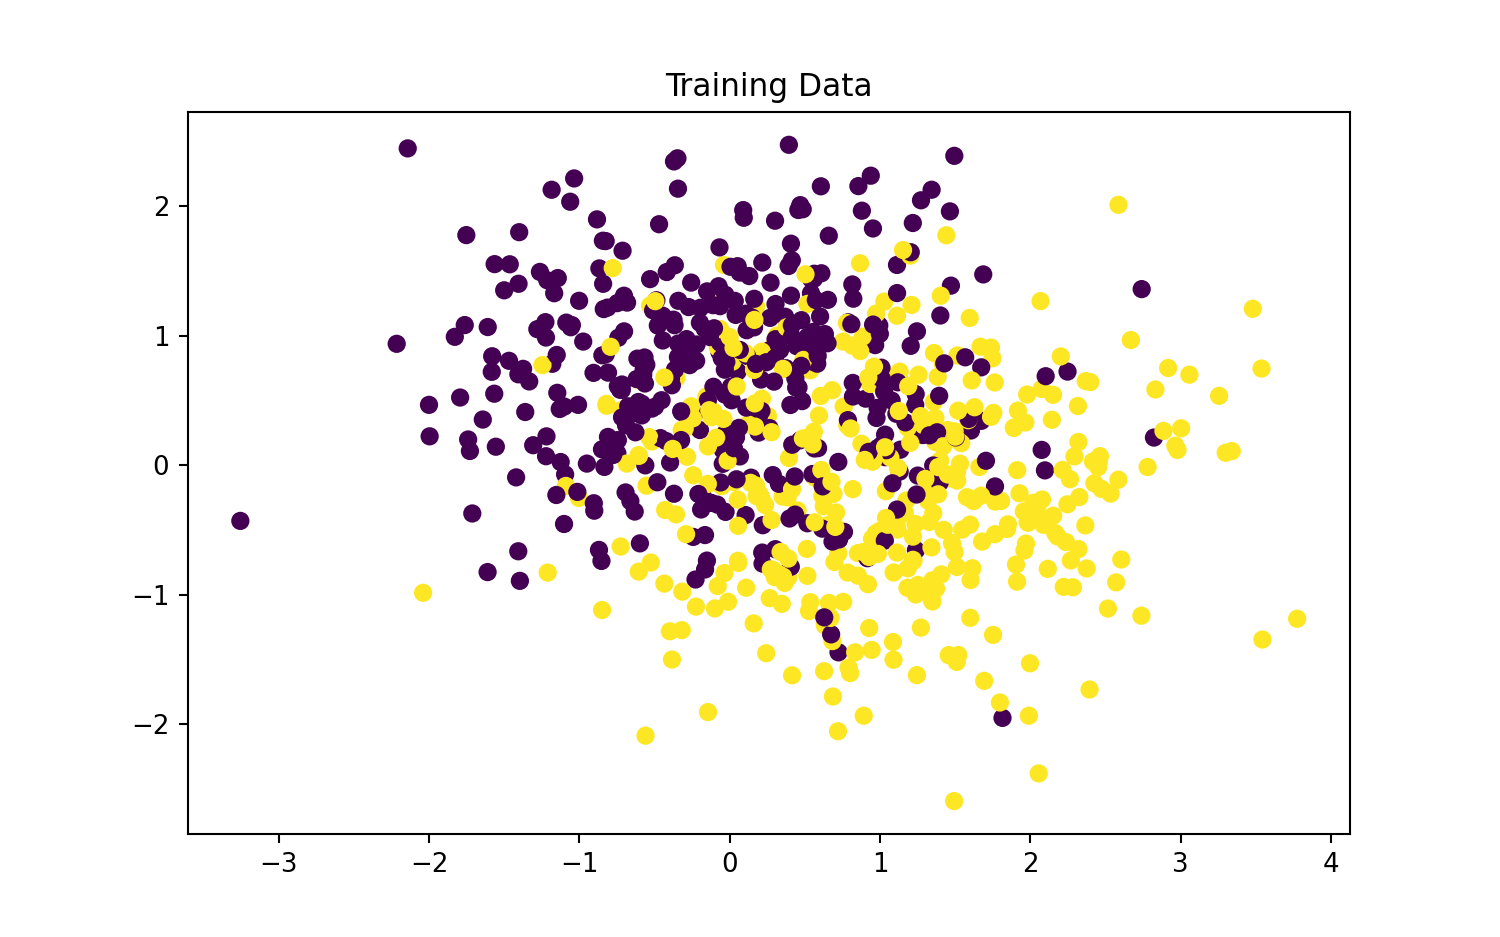

In [67]:
plt.figure(figsize=(8,5))
plt.scatter(X_train[:,0], X_train[:,1], c = Y_train)
plt.title('Training Data')
plt.show()

<IPython.core.display.Javascript object>


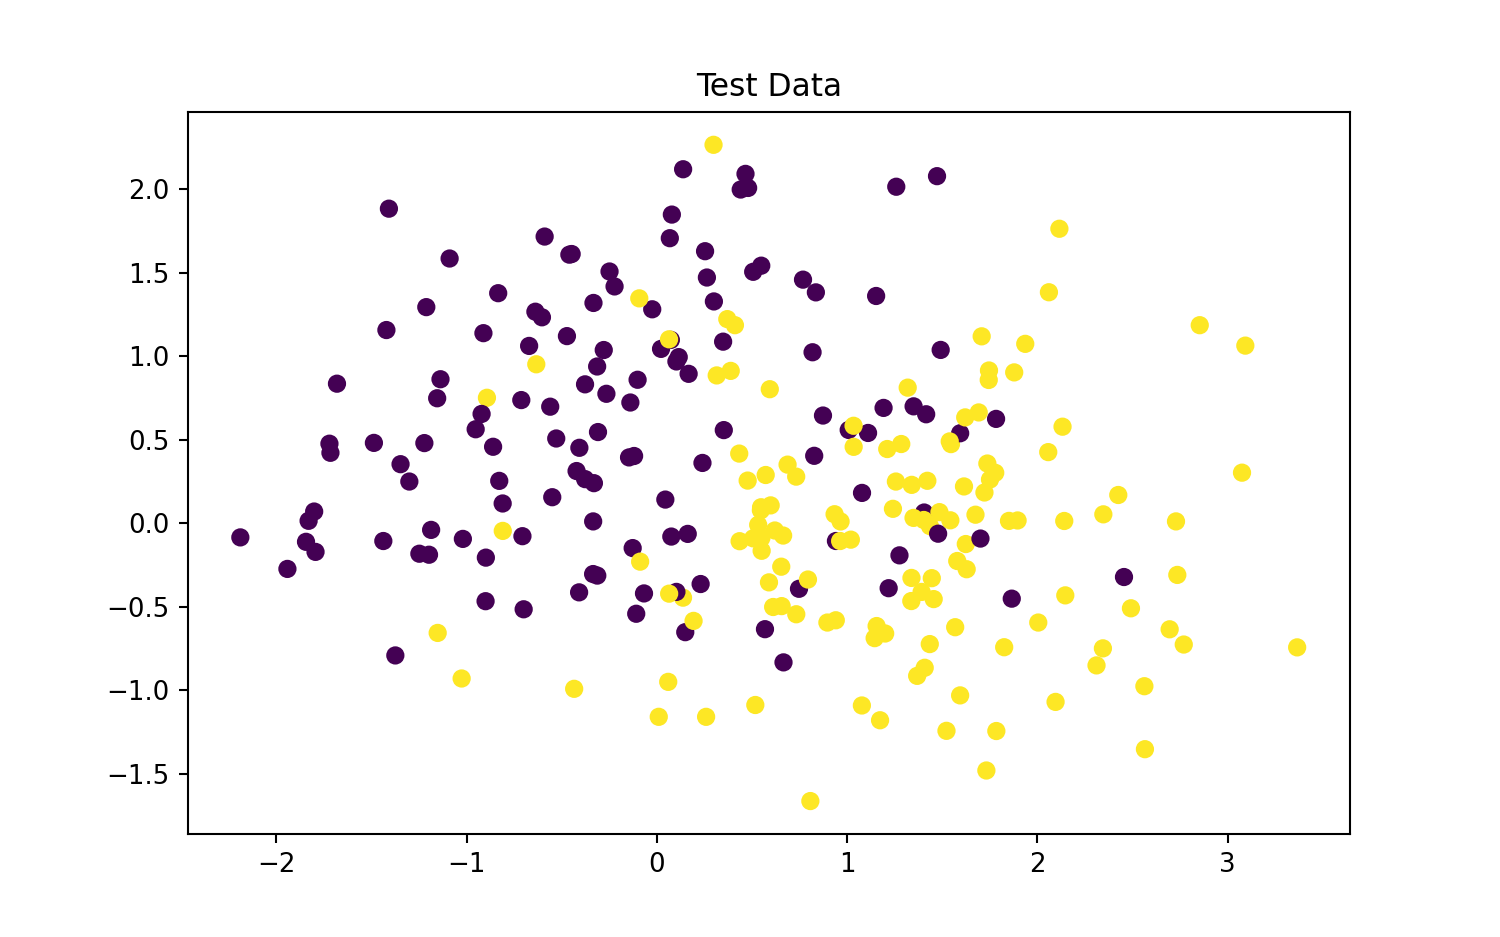

In [68]:
plt.figure(figsize=(8,5))
plt.scatter(X_test[:,0], X_test[:,1], c = Y_test)
plt.title('Test Data')
plt.show()

In [69]:
%%time
moon_scikit_clf_fit_score(X_train, Y_train, X_test, Y_test, 4)

Logistic Regression: 0.828
Decision Tree Classifier: 0.72
Linear SVC: 0.824
KNN Classifier: 0.756
Random Forest Classifier: 0.748
Gradient Boosting Classfier: 0.796
Wall time: 632 ms


In [70]:
%%time
moon_keras_nn_fit_score(X_train, Y_train, X_test, Y_test, 4)

Epoch 1/50
24/24 [==============================] - 0s 1ms/step - loss: 0.6307 - binary_accuracy: 0.6720
Epoch 2/50
24/24 [==============================] - 0s 1ms/step - loss: 0.5608 - binary_accuracy: 0.7547
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: 0.5186 - binary_accuracy: 0.7600
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4953 - binary_accuracy: 0.7653
Epoch 5/50
24/24 [==============================] - 0s 2ms/step - loss: 0.4866 - binary_accuracy: 0.7640
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 0.4835 - binary_accuracy: 0.7640
Epoch 7/50
24/24 [==============================] - 0s 2ms/step - loss: 0.4821 - binary_accuracy: 0.7640
Epoch 8/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4805 - binary_accuracy: 0.7640
Epoch 9/50
24/24 [==============================] - 0s 2ms/step - loss: 0.4802 - binary_accuracy: 0.7653
Epoch 10/50
24/24 [==============================] - 0s

In [71]:
%%time
moon_pytorch_nn_fit_score(X_train, Y_train, X_test, Y_test, 4)

PyTorch model training...
Epoch: 1, training loss: 0.5333777485688528
Epoch: 2, training loss: 0.4852039875779301
Epoch: 3, training loss: 0.4830910430929313
Epoch: 4, training loss: 0.48140514758757
Epoch: 5, training loss: 0.48028840649531535
Epoch: 6, training loss: 0.4793335375981405
Epoch: 7, training loss: 0.47865242886372533
Epoch: 8, training loss: 0.4779670725412046
Epoch: 9, training loss: 0.47739467419528714
Epoch: 10, training loss: 0.47668199023169777
Epoch: 11, training loss: 0.4761531970957294
Epoch: 12, training loss: 0.47622927428378414
Epoch: 13, training loss: 0.47537995644674325
Epoch: 14, training loss: 0.47491755763829374
Epoch: 15, training loss: 0.4743329920535907
Epoch: 16, training loss: 0.4739472701828151
Epoch: 17, training loss: 0.47350970864947883
Epoch: 18, training loss: 0.4730707983012932
Epoch: 19, training loss: 0.47266733496263624
Epoch: 20, training loss: 0.47231204064756943
Epoch: 21, training loss: 0.47191501209908165
Epoch: 22, training loss: 0.4

In [72]:
moon_accuracy_df

Dataset 1 Dataset 2 Dataset 3 Dataset 4 Dataset 5
Logistic Regression              0.88     0.884     0.852     0.828       NaN
Decision Tree Classifier        0.992     0.868     0.756      0.72       NaN
Linear SVC                       0.88     0.884     0.856     0.824       NaN
KNN Classifier                  0.996     0.888     0.828     0.756       NaN
Random Forest Classifier        0.988     0.896     0.816     0.748       NaN
Gradient Boosting Classfier     0.992     0.896     0.816     0.796       NaN
Keras NN                        0.992     0.896     0.864     0.828       NaN
PyTorch NN                      0.996     0.896     0.832     0.832       NaN

Looking at the accuracy values across the moon datasets, the two neural networks performed consistently well in comparison to the other algorithms. Also, Logistic Regression and Linear SVC did surprisingly well considering the datasets are not linearly separable, and the decision boundaries for both algorithms are linear.  

Looking at the training sets, we can see that they are somewhat linearly separable, or at least there are visible boundaries that minize the number of misclassifications for both classes. That explains why Logistic Regression and Linear SVC did so well.

In [73]:
moon_X_5, moon_Y_5 = make_moons(1000, noise = 1, random_state=47)
X_train, X_test, Y_train, Y_test = train_test_split(moon_X_5, moon_Y_5, 
                                                    test_size = 0.25, random_state = 47)

<IPython.core.display.Javascript object>


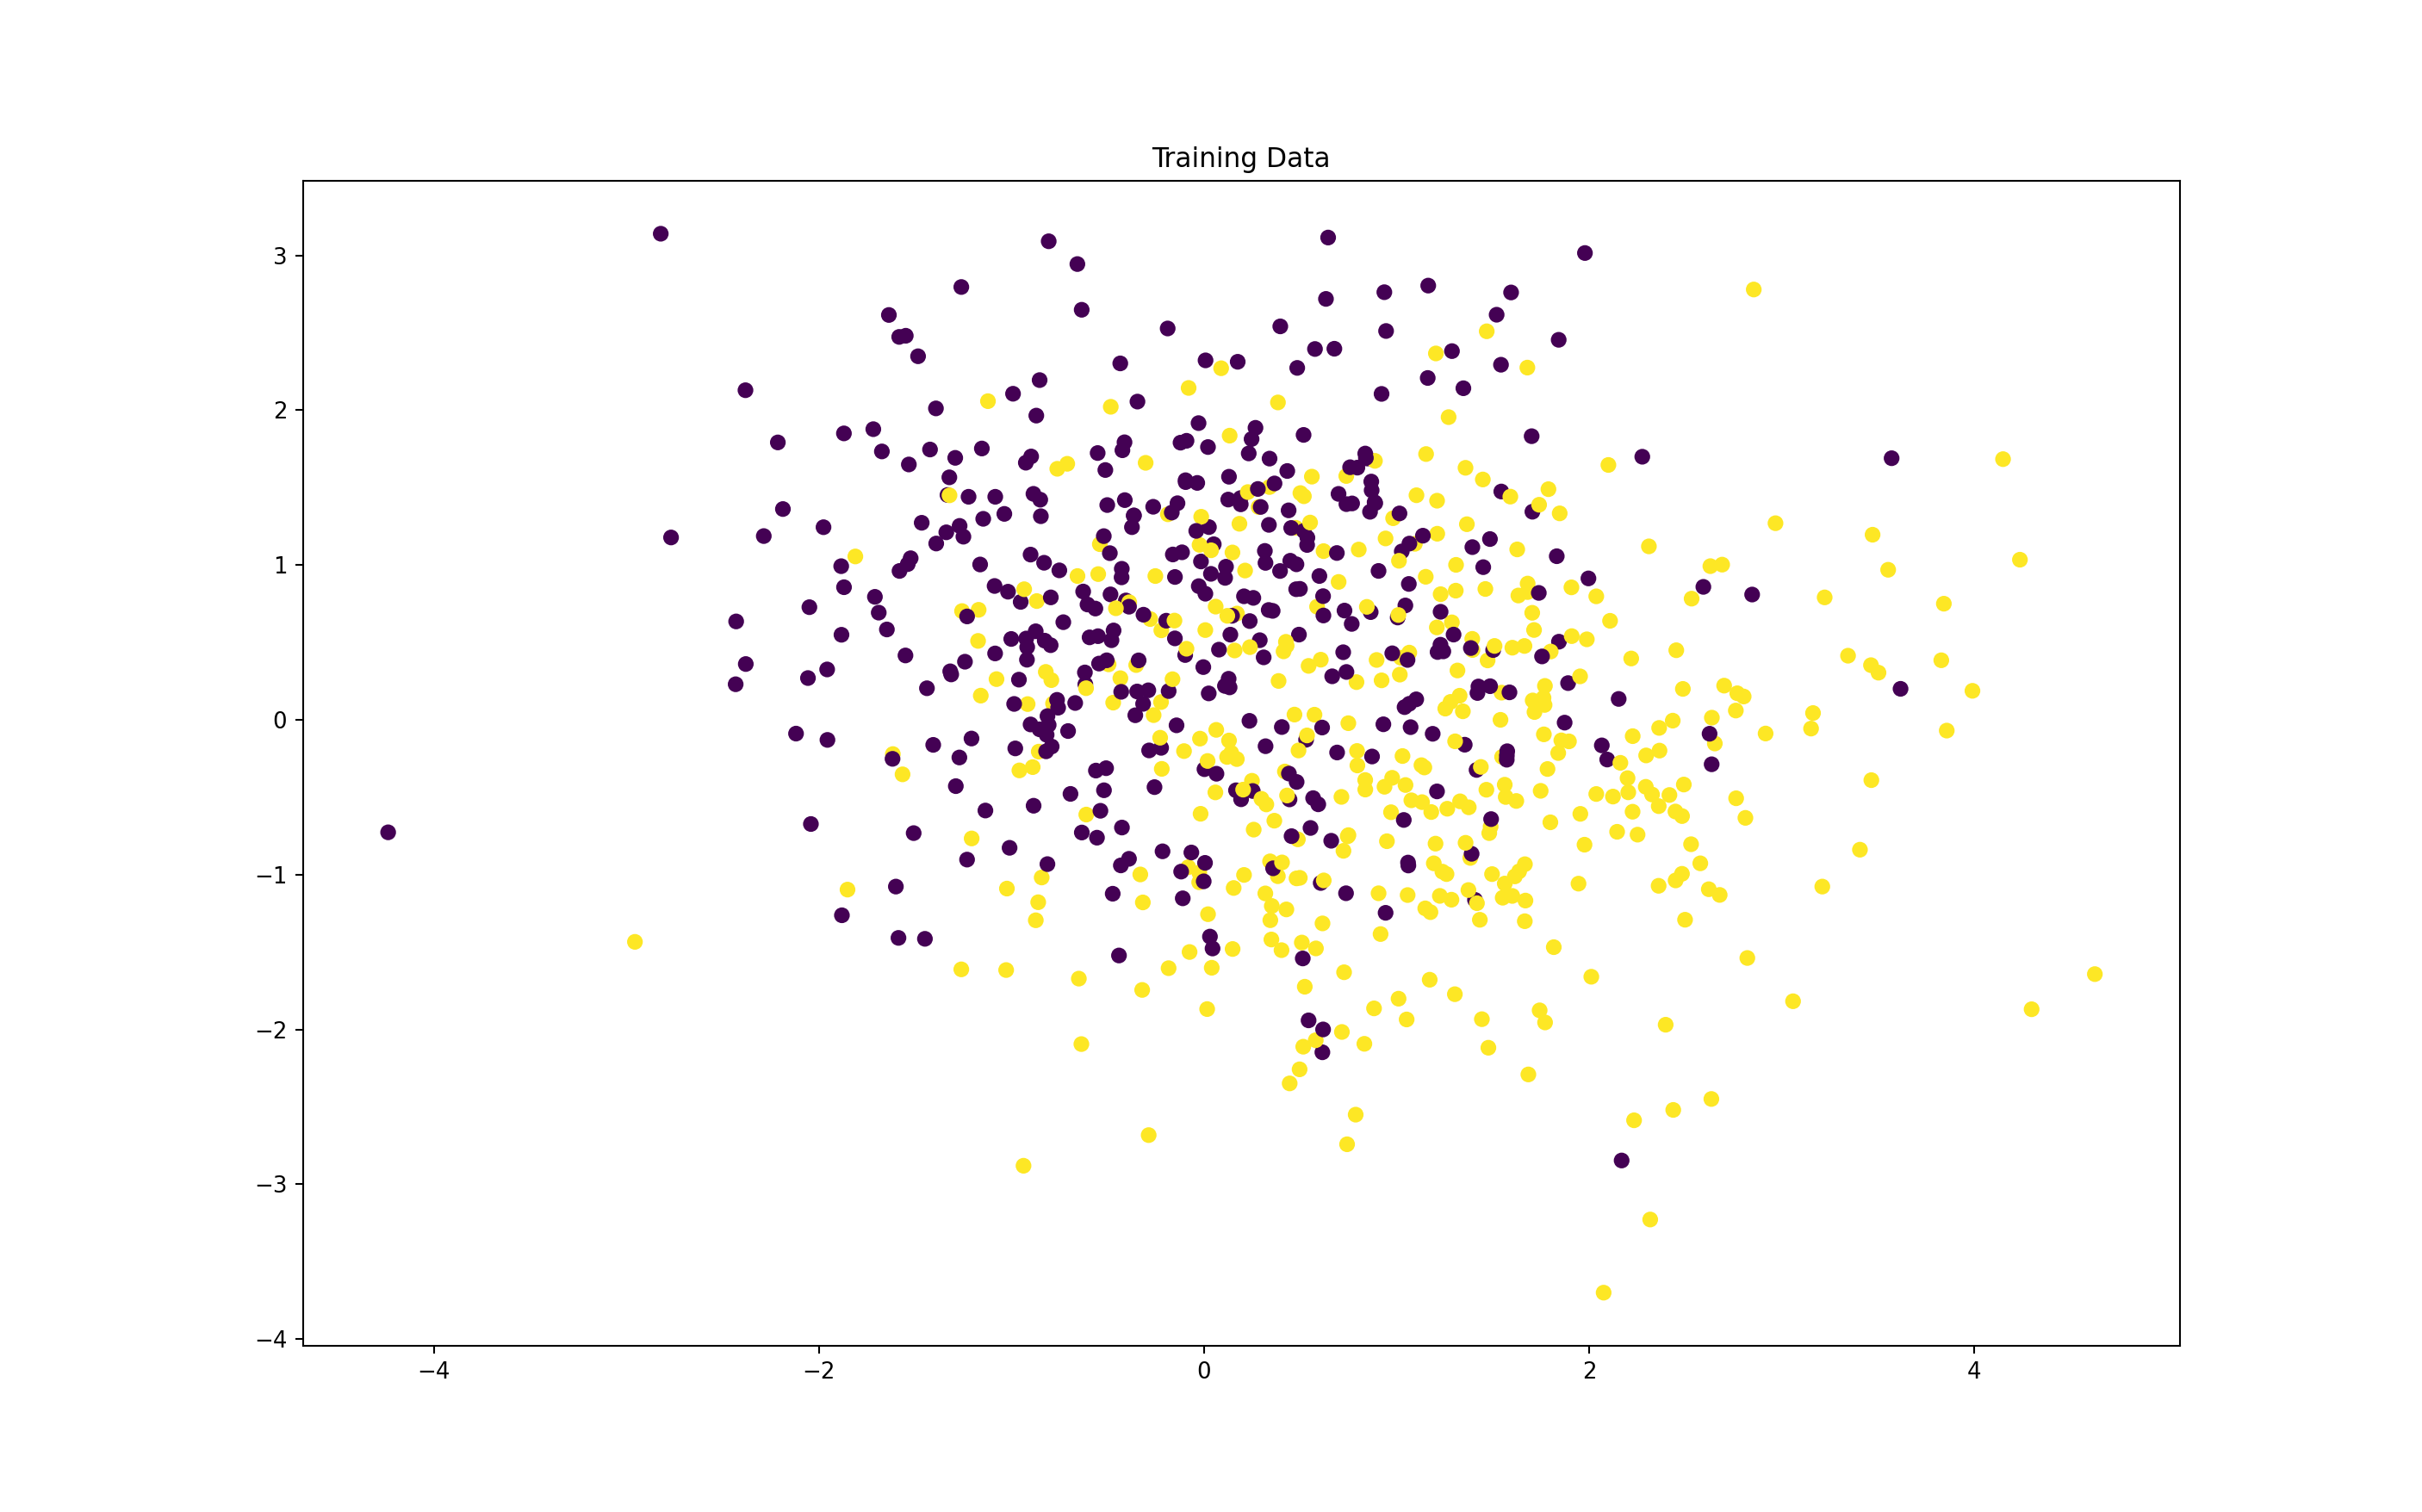

In [74]:
plt.figure(figsize=(8,5))
plt.scatter(X_train[:,0], X_train[:,1], c = Y_train)
plt.title('Training Data')
plt.show()

<IPython.core.display.Javascript object>


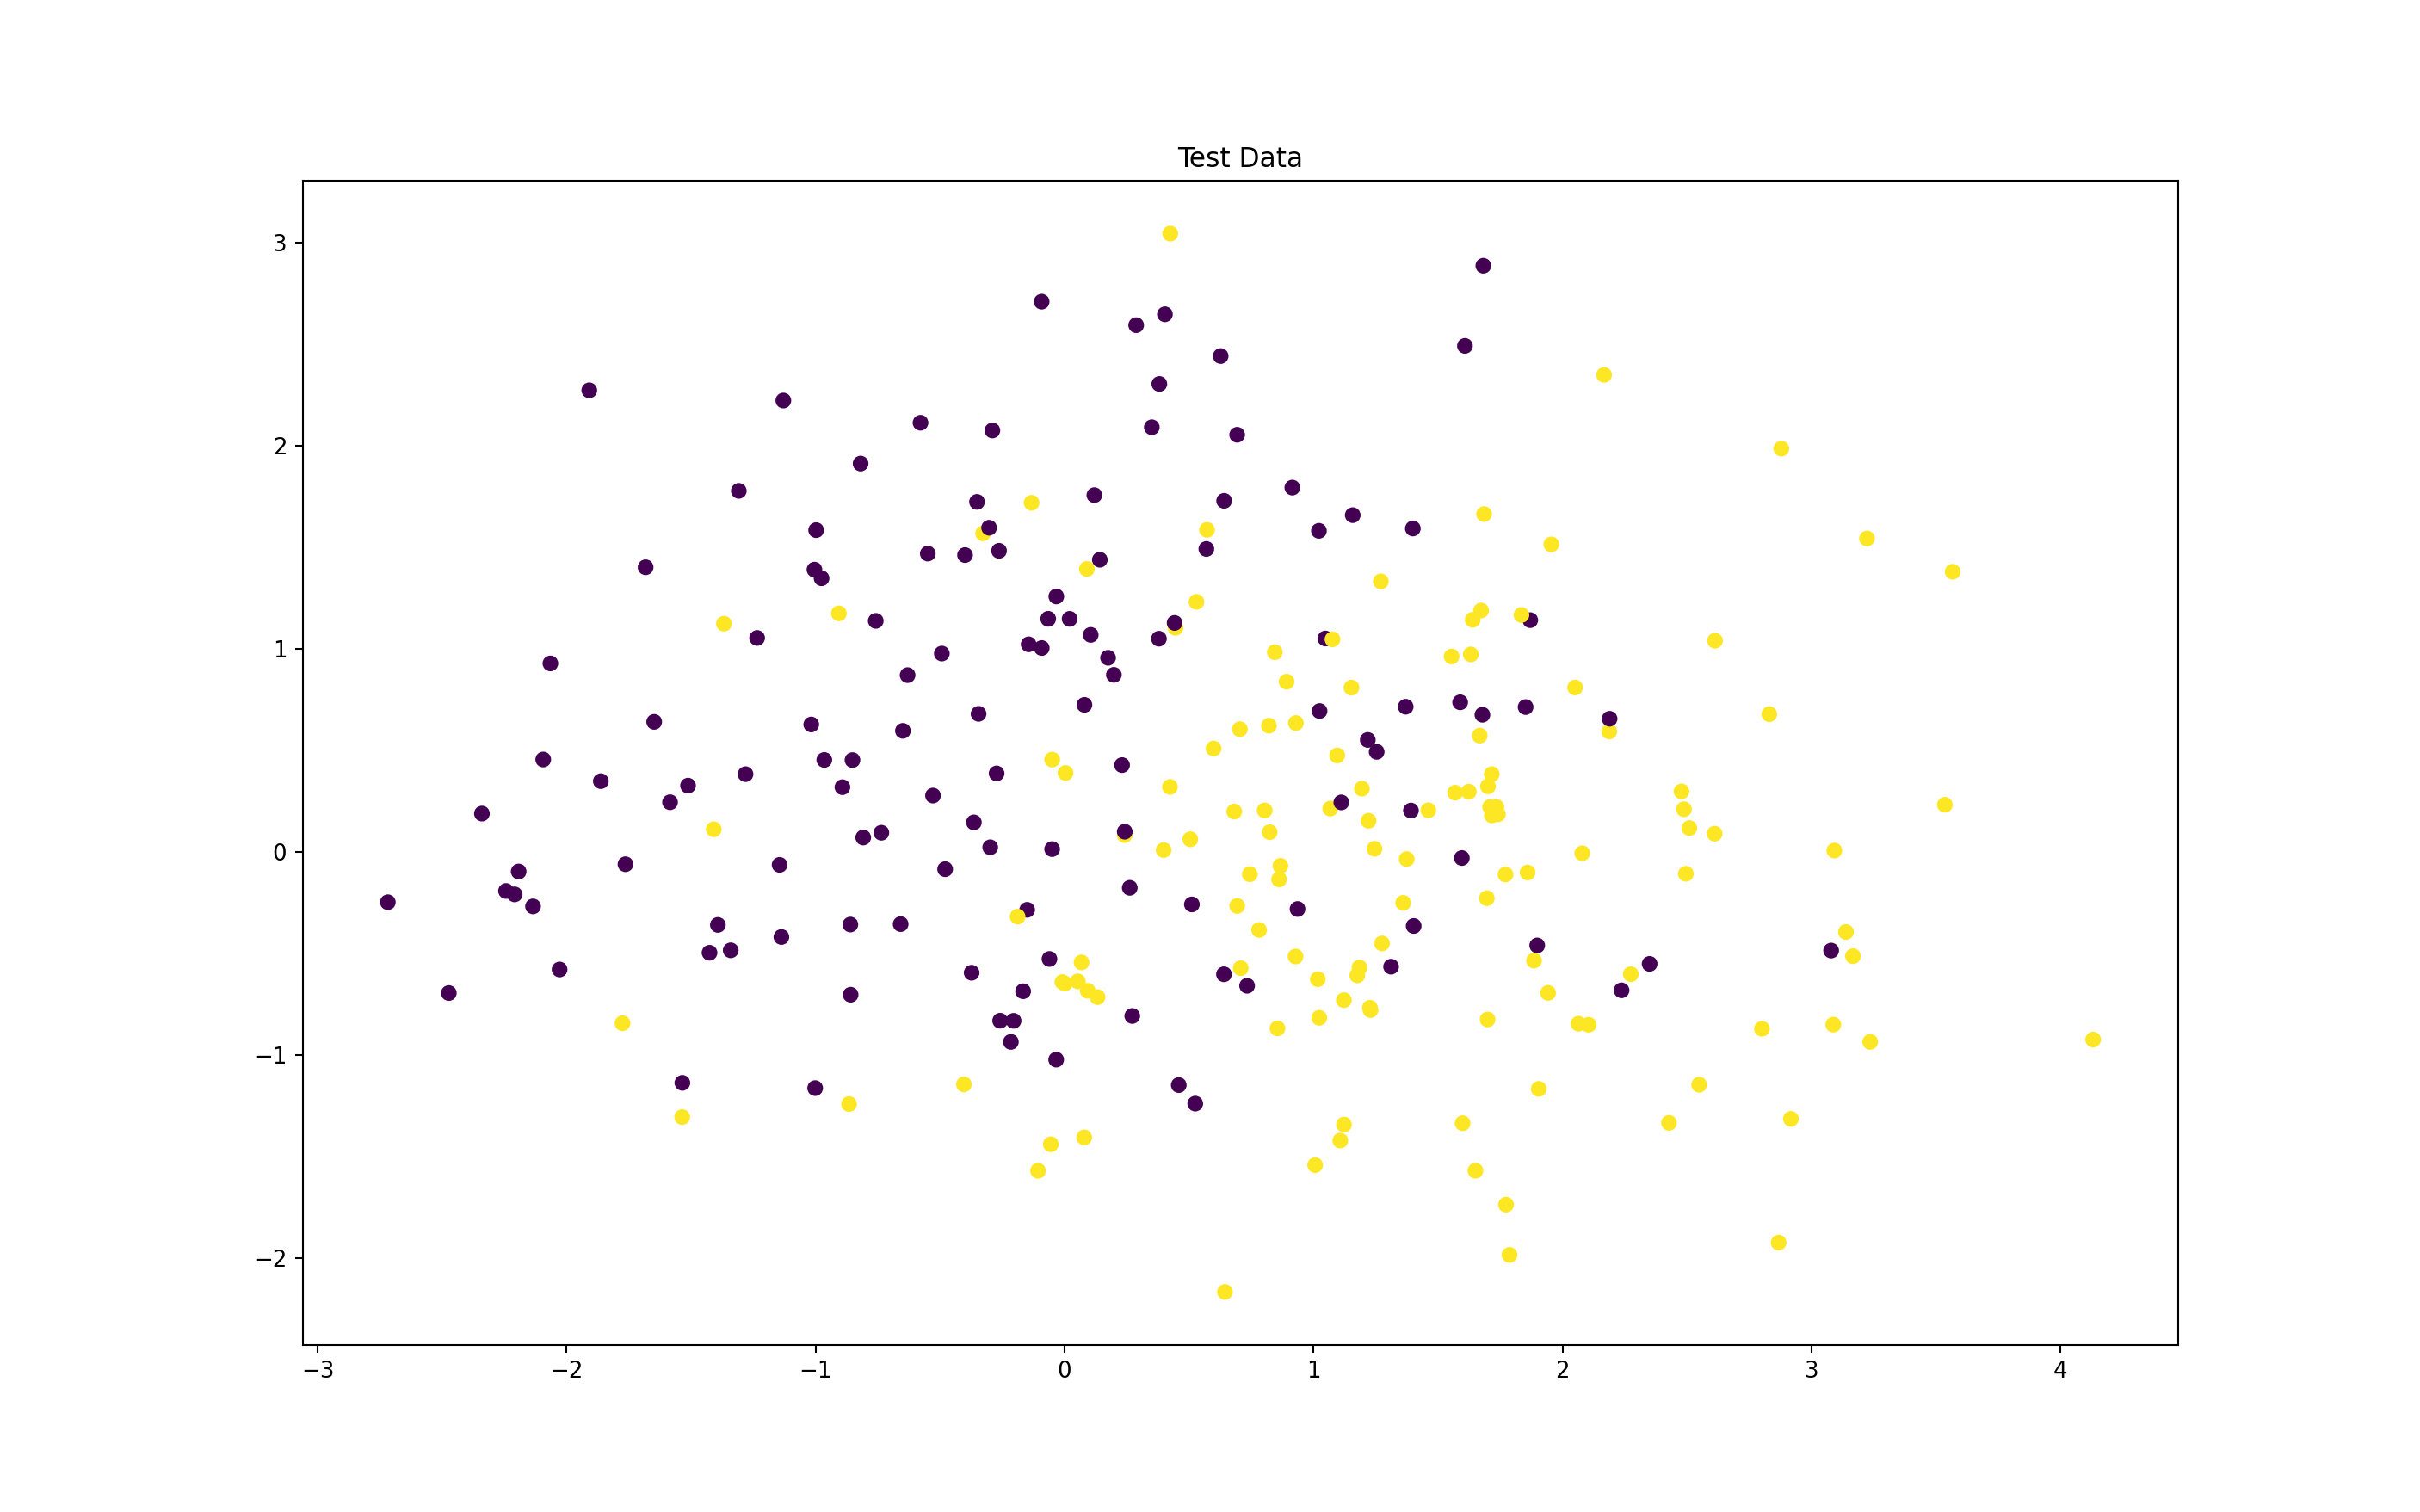

In [75]:
plt.figure(figsize=(8,5))
plt.scatter(X_test[:,0], X_test[:,1], c = Y_test)
plt.title('Test Data')
plt.show()

In [76]:
%%time
moon_scikit_clf_fit_score(X_train, Y_train, X_test, Y_test, 5)

Logistic Regression: 0.768
Decision Tree Classifier: 0.688
Linear SVC: 0.768
KNN Classifier: 0.736
Random Forest Classifier: 0.712
Gradient Boosting Classfier: 0.78
Wall time: 721 ms


In [77]:
%%time
moon_keras_nn_fit_score(X_train, Y_train, X_test, Y_test, 5)

Epoch 1/50
24/24 [==============================] - 0s 1ms/step - loss: 0.7253 - binary_accuracy: 0.4960
Epoch 2/50
24/24 [==============================] - 0s 1ms/step - loss: 0.6380 - binary_accuracy: 0.6733
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 0.5853 - binary_accuracy: 0.7213
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.5611 - binary_accuracy: 0.7240
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.5500 - binary_accuracy: 0.7293
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 0.5473 - binary_accuracy: 0.7320
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 0.5454 - binary_accuracy: 0.7320
Epoch 8/50
24/24 [==============================] - 0s 1ms/step - loss: 0.5453 - binary_accuracy: 0.7307
Epoch 9/50
24/24 [==============================] - 0s 1ms/step - loss: 0.5438 - binary_accuracy: 0.7333
Epoch 10/50
24/24 [==============================] - 0s

In [78]:
%%time
moon_pytorch_nn_fit_score(X_train, Y_train, X_test, Y_test, 5)

PyTorch model training...
Epoch: 1, training loss: 0.5805839634488026
Epoch: 2, training loss: 0.5493707890305668
Epoch: 3, training loss: 0.5475608682353049
Epoch: 4, training loss: 0.5465419103850921
Epoch: 5, training loss: 0.545566381111741
Epoch: 6, training loss: 0.5450252979531264
Epoch: 7, training loss: 0.5445203224420547
Epoch: 8, training loss: 0.5438705723481253
Epoch: 9, training loss: 0.5435590330210204
Epoch: 10, training loss: 0.543092950313973
Epoch: 11, training loss: 0.5427048656043286
Epoch: 12, training loss: 0.5423154450077563
Epoch: 13, training loss: 0.5419819989114378
Epoch: 14, training loss: 0.5417186843585223
Epoch: 15, training loss: 0.5415484575995555
Epoch: 16, training loss: 0.541295618217128
Epoch: 17, training loss: 0.540992075503183
Epoch: 18, training loss: 0.5406709121152138
Epoch: 19, training loss: 0.5405417006375889
Epoch: 20, training loss: 0.5402602218144262
Epoch: 21, training loss: 0.5400681319879368
Epoch: 22, training loss: 0.53979937434786

In [79]:
moon_accuracy_df

Dataset 1 Dataset 2 Dataset 3 Dataset 4 Dataset 5
Logistic Regression              0.88     0.884     0.852     0.828     0.768
Decision Tree Classifier        0.992     0.868     0.756      0.72     0.688
Linear SVC                       0.88     0.884     0.856     0.824     0.768
KNN Classifier                  0.996     0.888     0.828     0.756     0.736
Random Forest Classifier        0.988     0.896     0.816     0.748     0.712
Gradient Boosting Classfier     0.992     0.896     0.816     0.796      0.78
Keras NN                        0.992     0.896     0.864     0.828     0.772
PyTorch NN                      0.996     0.896     0.832     0.832     0.792

The two classes in the last dataset were pretty well mixed, but almost all of the classifiers managed to achieve over 70% accuracy. Throughout the comparison, the neural networks, the KNN, and the ensemble classifiers did consistently well. Between the two NNs, Keras was much faster to train. KNN and ensemble classifiers were even faster. The amount of training data definitely has an impact on that, and the times would change with a larger training set. 